In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import scipy as sc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt #for plots
%matplotlib inline
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score 
import statsmodels.api as sm

In [65]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [67]:
!pip install imblearn

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC

from collections import Counter
#from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

#from xgboost import XGBClassifier
from scipy import stats
import joblib

In [3]:
from scipy.io import arff
import seaborn as sns

In [4]:

arff_file = arff.loadarff('seismic-bumps.arff')


In [5]:
df = pd.DataFrame(arff_file[0])


In [6]:
df.head()

seismic seismoacoustic shift  genergy  gpuls  gdenergy  gdpuls ghazard  \
0    b'a'           b'a'  b'N'  15180.0   48.0     -72.0   -72.0    b'a'   
1    b'a'           b'a'  b'N'  14720.0   33.0     -70.0   -79.0    b'a'   
2    b'a'           b'a'  b'N'   8050.0   30.0     -81.0   -78.0    b'a'   
3    b'a'           b'a'  b'N'  28820.0  171.0     -23.0    40.0    b'a'   
4    b'a'           b'a'  b'N'  12640.0   57.0     -63.0   -52.0    b'a'   

   nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   

   energy  maxenergy class  
0     0.0        0.0  b'0'  
1  2000.0     2000.0  b'0'  
2     0.0        0.0  b'0'  
3  3000.0     3000.0  b'0'  
4     0.0        0.0  b'0'

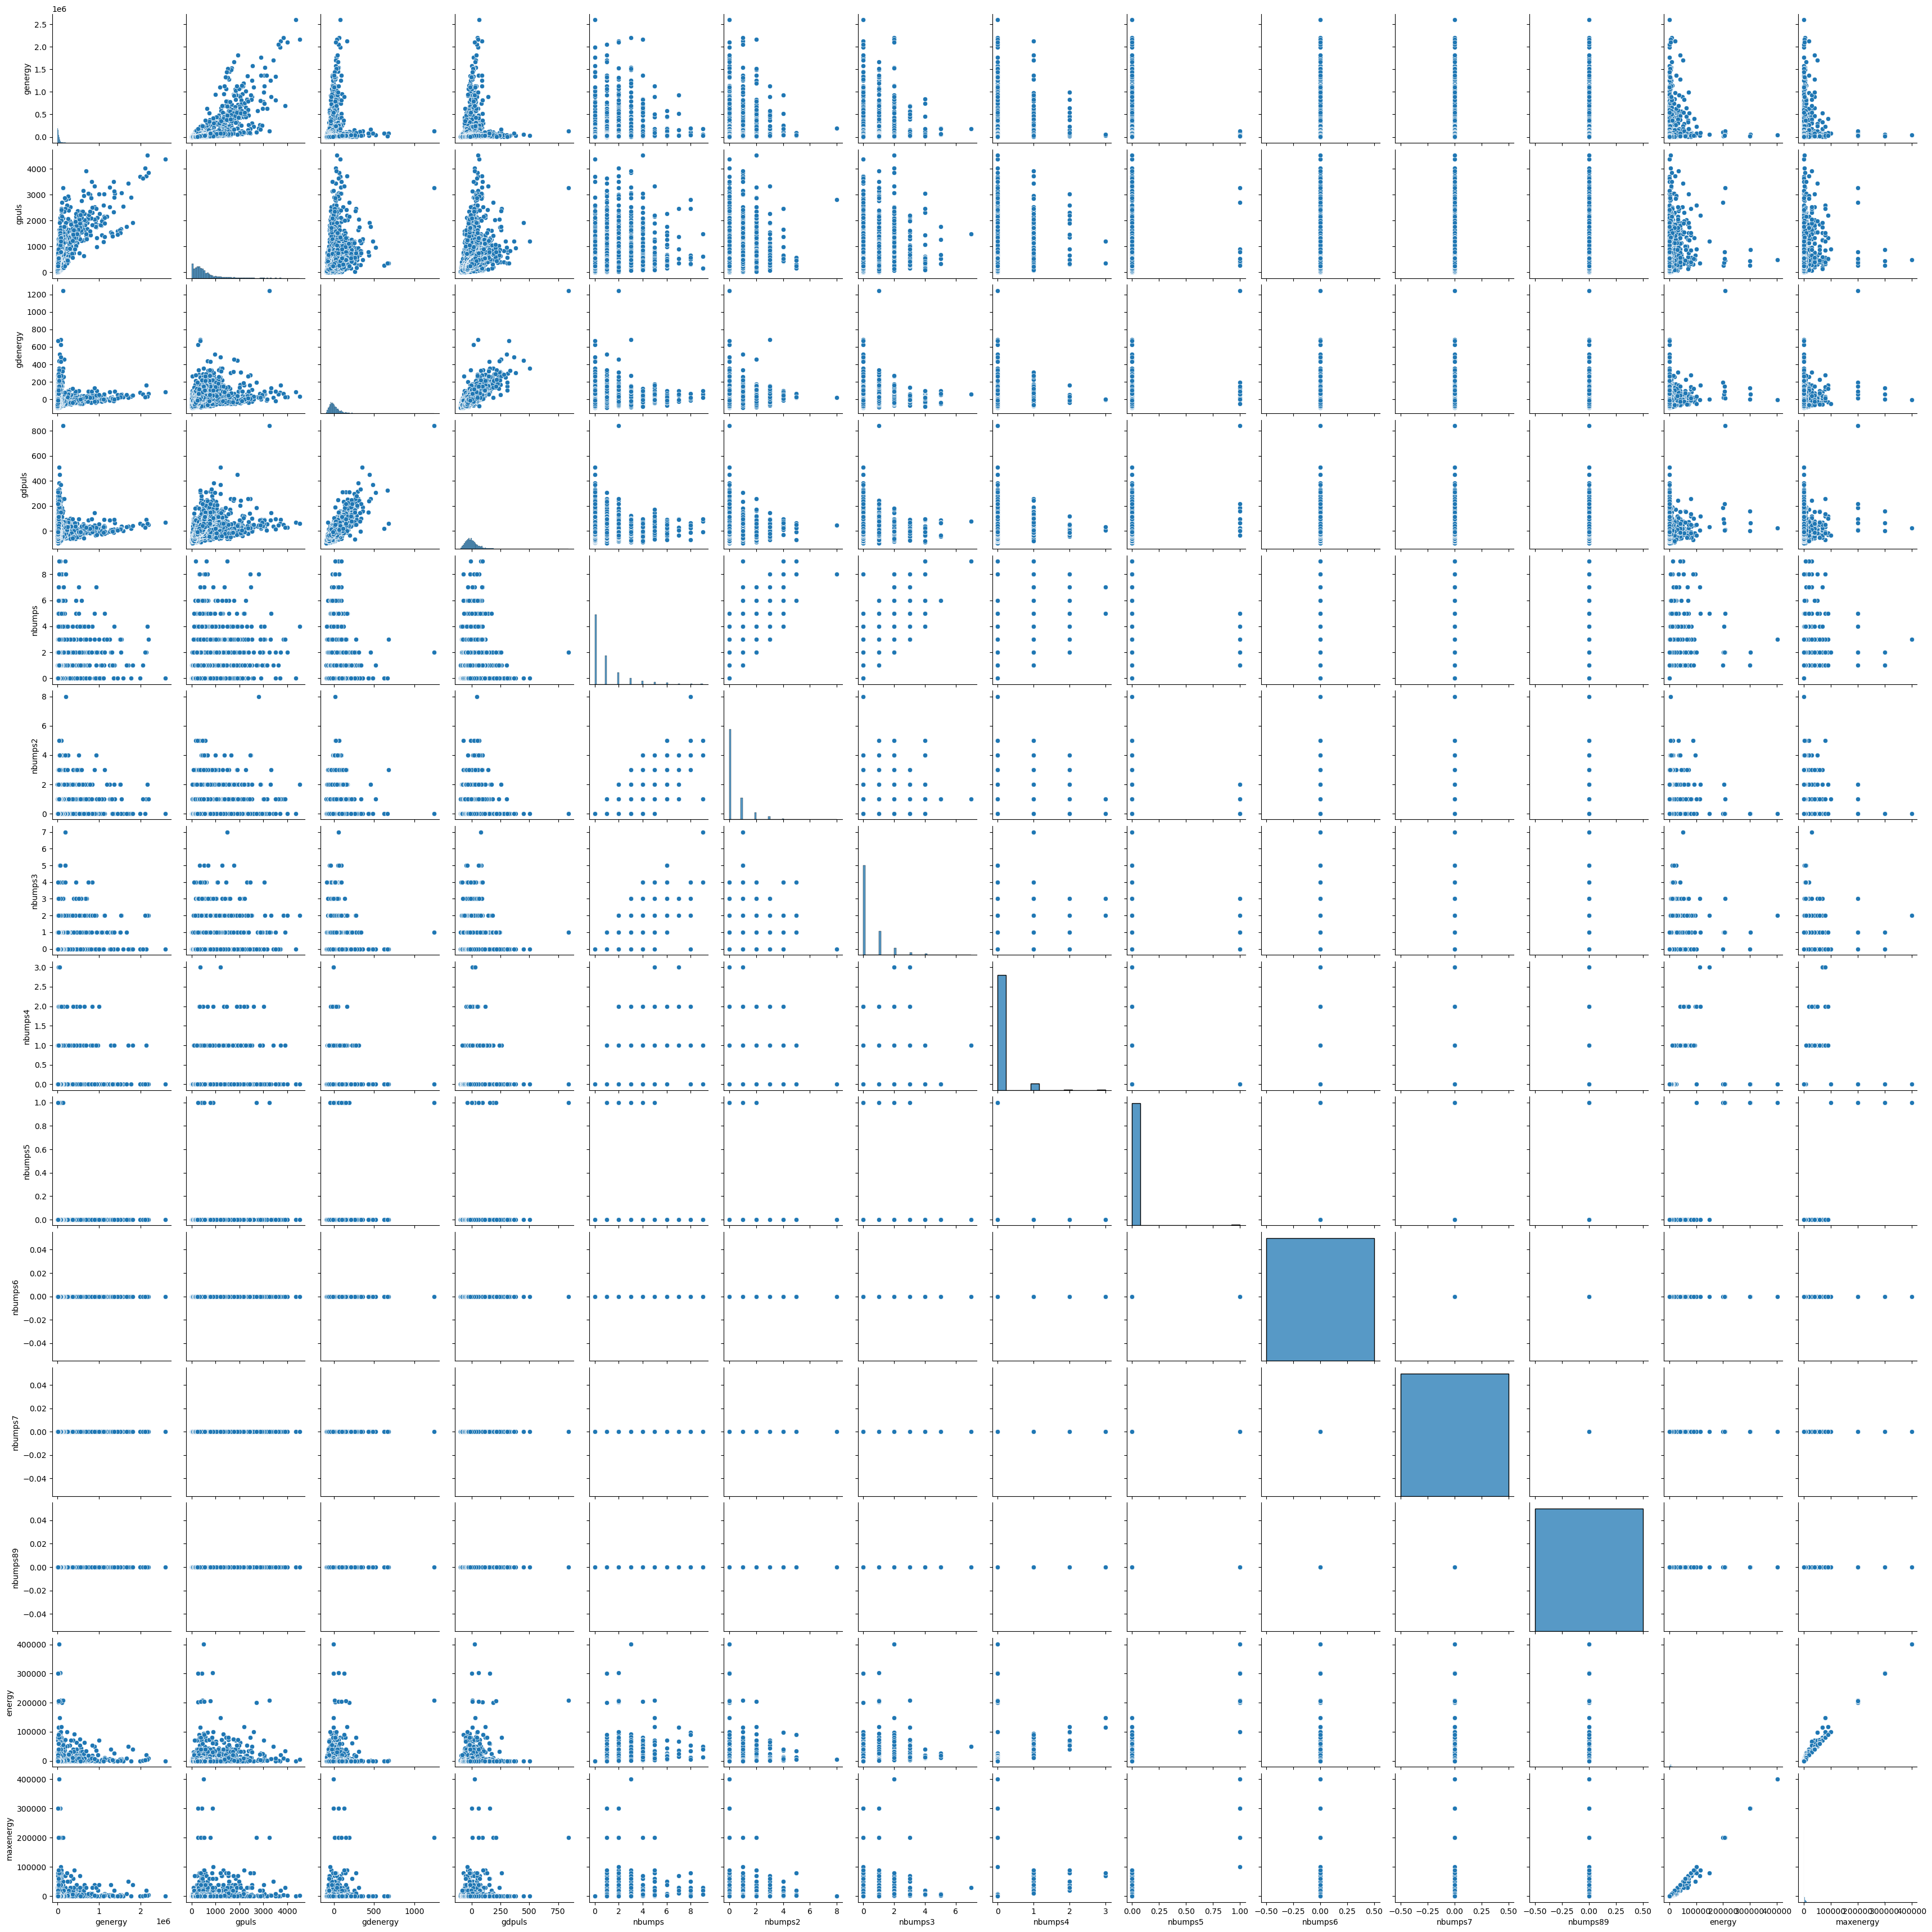

In [5]:
sns.pairplot(df)

In [6]:
df.head(15)

seismic seismoacoustic shift   genergy  gpuls  gdenergy  gdpuls ghazard  \
0     b'a'           b'a'  b'N'   15180.0   48.0     -72.0   -72.0    b'a'   
1     b'a'           b'a'  b'N'   14720.0   33.0     -70.0   -79.0    b'a'   
2     b'a'           b'a'  b'N'    8050.0   30.0     -81.0   -78.0    b'a'   
3     b'a'           b'a'  b'N'   28820.0  171.0     -23.0    40.0    b'a'   
4     b'a'           b'a'  b'N'   12640.0   57.0     -63.0   -52.0    b'a'   
5     b'a'           b'a'  b'W'   63760.0  195.0     -73.0   -65.0    b'a'   
6     b'a'           b'a'  b'W'  207930.0  614.0      -6.0    18.0    b'a'   
7     b'a'           b'a'  b'N'   48990.0  194.0     -27.0    -3.0    b'a'   
8     b'a'           b'a'  b'N'  100190.0  303.0      54.0    52.0    b'a'   
9     b'a'           b'a'  b'W'  247620.0  675.0       4.0    25.0    b'a'   
10    b'a'           b'a'  b'N'   41950.0  135.0     -39.0   -36.0    b'a'   
11    b'a'           b'a'  b'N'   53250.0  140.0     -19.0   -31.0    b'a'   
12    b'a'           b'a'  b'W'  166180.0  448.0     -30.0   -19.0    b'a'   
13    b'a'           b'a'  b'N'   64540.0  215.0       0.0     9.0    b'a'   
14    b'a'           b'a'  b'N'   75670.0  207.0      18.0     4.0    b'a'   

    nbumps  nbumps2  nbumps3  nbumps4  nbumps5  nbumps6  nbumps7  nbumps89  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
1      1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
3      1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
5      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
6      2.0      2.0      0.0      0.0      0.0      0.0      0.0       0.0   
7      1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
8      0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
9      1.0      1.0      0.0      0.0      0.0      0.0      0.0       0.0   
10     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
11     0.0      0.0      0.0      0.0      0.0      0.0      0.0       0.0   
12     1.0      1.0      0.0      0.0      0.0      0.0      0.0       0.0   
13     1.0      0.0      1.0      0.0      0.0      0.0      0.0       0.0   
14     1.0      1.0      0.0      0.0      0.0      0.0      0.0       0.0   

    energy  maxenergy class  
0      0.0        0.0  b'0'  
1   2000.0     2000.0  b'0'  
2      0.0        0.0  b'0'  
3   3000.0     3000.0  b'0'  
4      0.0        0.0  b'0'  
5      0.0        0.0  b'0'  
6   1000.0      700.0  b'0'  
7   4000.0     4000.0  b'0'  
8      0.0        0.0  b'0'  
9    500.0      500.0  b'0'  
10  5000.0     5000.0  b'0'  
11     0.0        0.0  b'0'  
12   400.0      400.0  b'0'  
13  6000.0     6000.0  b'0'  
14   600.0      600.0  b'0'

In [7]:
#preliminary cleaning
df['seismic'].replace({b'a': 0, b'b': 1}, inplace=True)
df['seismic'].replace({b'a': 0, b'b': 1}, inplace=True)

df['class'].replace({b'0': 0, b'1': 1}, inplace=True)
df['seismic']

0       0
1       0
2       0
3       0
4       0
       ..
2579    1
2580    1
2581    1
2582    0
2583    0
Name: seismic, Length: 2584, dtype: int64

In [8]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

# new


In [7]:

### Categorizing columns in types of features and labels


label = 'class'
col_list_categorical = ['seismic', 'seismoacoustic', 'shift', 'ghazard']
col_list_numerical = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
col_list_discrete = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']
len([label]) + len(col_list_categorical) + len(col_list_discrete) + len(col_list_numerical)


19

In [8]:

for col in df.columns:
    if col in col_list_categorical + [label]:
        df[col] = df[col].str.decode("utf-8")
        if col == label:
            print(df[col].value_counts())
            df[col] = df[col].astype(int)

df.dtypes

0    2414
1     170
Name: class, dtype: int64


seismic            object
seismoacoustic     object
shift              object
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard            object
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class               int32
dtype: object

In [9]:
df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

C:\Users\katen\AppData\Local\Temp\ipykernel_23412\2697126705.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


# Target distribution

Text(0, 0.5, 'COUNT')

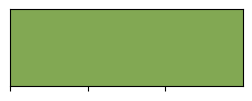

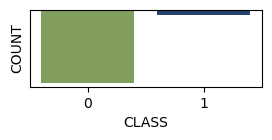

In [10]:

"""### Target Distributions Check"""

df['class'].value_counts() * 100 /len(df['class'])

colors = sns.color_palette([sns.color_palette("gist_earth_r")[2], sns.color_palette("gist_earth_r")[5]])
# The colors are:
sns.palplot(sns.color_palette("gist_earth_r")[2]), sns.palplot(sns.color_palette("gist_earth_r")[5])
sns.countplot(x=label, data=df, palette=colors)
plt.xlabel('CLASS')
plt.ylabel('COUNT')

### Categorical Feature Encoding

#### Categorical Variables Distributions

[Attribute information](https://archive.ics.uci.edu/ml/datasets/seismic-bumps):
1. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic
method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method;
3. shift: information about type of a shift (W - coal-getting, N -preparation shift);



In [11]:

for col in col_list_categorical:
    print(df[col].value_counts())

a    1682
b     902
Name: seismic, dtype: int64
a    1580
b     956
c      48
Name: seismoacoustic, dtype: int64
W    1663
N     921
Name: shift, dtype: int64
a    2342
b     212
c      30
Name: ghazard, dtype: int64


In [12]:

"""#### Contingency tables for categorical variables"""

df.seismic.value_counts()

data_crosstab = pd.crosstab(df['seismic'], df[label], colnames=['class'])
data_crosstab

"""Larger fraction in (b | 1)"""

data_crosstab = pd.crosstab(df['seismoacoustic'], df[label], colnames=['class'])
data_crosstab

class              0    1
seismoacoustic           
a               1479  101
b                890   66
c                 45    3

In [13]:
"""10% of the (W | 0) is 1."""

data_crosstab = pd.crosstab(df['shift'], df[label])
data_crosstab


class     0    1
shift           
N       904   17
W      1510  153

In [14]:

"""Similar ratios"""

data_crosstab = pd.crosstab(df['ghazard'], df[label])
data_crosstab


class       0    1
ghazard           
a        2186  156
b         198   14
c          30    0


"""#### Encode hazard assesment with numerical values: the assessment coding being graded from Low to High, coding numerically adds meaningful information.

[Attribute information](https://archive.ics.uci.edu/ml/datasets/seismic-bumps):
1. seismic: result of shift seismic hazard assessment in the mine working obtained by the seismic
method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. seismoacoustic: result of shift seismic hazard assessment in the mine working obtained by the
seismoacoustic method;
3. shift: information about type of a shift (W - coal-getting, N -preparation shift);
"""


In [15]:

def numeric_encoder(col_name, df):
    try:
      df[col_name + "_enc_0"] = df[col_name].map({'a': 0, 'b': 1, 'c' : 2, 'W' : 0, 'N' : 1})
      df.drop(columns=col, inplace=True)
      return df
    except Exception as e:
        print(e)
        print("Error in numeric encoding feature : " + col_name)

for col in col_list_categorical:
    df = numeric_encoder(col, df)

"""#### One-hot encoder: REPLACED With Numeric encoding above"""

'#### One-hot encoder: REPLACED With Numeric encoding above'

In [16]:
df.shape

(2584, 19)

In [17]:

def one_hot_encoder(col_name, df):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(drop='first', sparse=False)
    try:
        encoded_array = label_encoder.fit_transform(df[col_name])
        print(label_encoder.classes_)
#         SKLEARN IMPLEMENTATION
        encoded_array_reshaped = encoded_array.reshape(len(encoded_array), 1)
        one_hot_encoded_array = onehot_encoder.fit_transform(encoded_array_reshaped)
#         one_hot_encoded_array = to_categorical(encoded_array)
        print(one_hot_encoded_array)
        num_features = one_hot_encoded_array.shape[1]
        print("Number of encoded columns to add: ", num_features)
        new_enc_col_names = [col + '_enc_' + str(num) for num in range(0, num_features)] 
        df_enc = pd.DataFrame(one_hot_encoded_array)
        print("Shape of encoded df: ", df_enc.shape)
        df_enc.columns = new_enc_col_names
        print("New column names: ", new_enc_col_names)
        df = pd.concat([df, df_enc], axis=1)
        df.drop(columns=col, inplace=True)
        return df
    except Exception as e:
        print(e)
        print("Error in encoding feature : " + col_name)

In [18]:
df.shift_enc_0.value_counts()

0    1663
1     921
Name: shift_enc_0, dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'genergy'),
  Text(0, 1.5, 'gpuls'),
  Text(0, 2.5, 'gdenergy'),
  Text(0, 3.5, 'gdpuls'),
  Text(0, 4.5, 'energy'),
  Text(0, 5.5, 'maxenergy')])

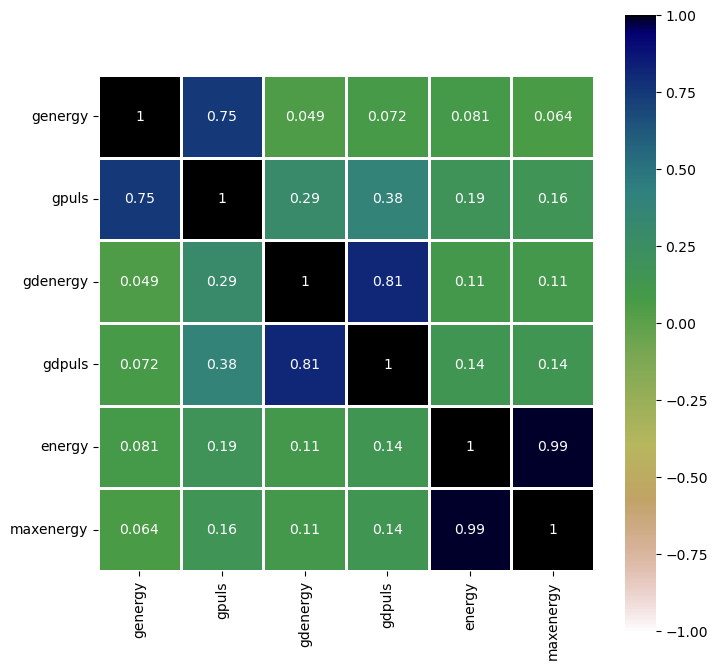

In [19]:

### Numeric Feature Scaling


df[col_list_numerical].describe()

df_corr = df[col_list_numerical].corr()

df_corr

plt.figure(figsize=[8, 8])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [20]:
"""#### genergy and gpuls"""


'#### genergy and gpuls'

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\1191928001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['genergy'], hist=True)
C:\Users\katen\AppData\Local\Temp\ipykernel_10156\1191928001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['genergy']), hist=True)
C:\Users\k

<Axes: xlabel='genergy', ylabel='gpuls'>

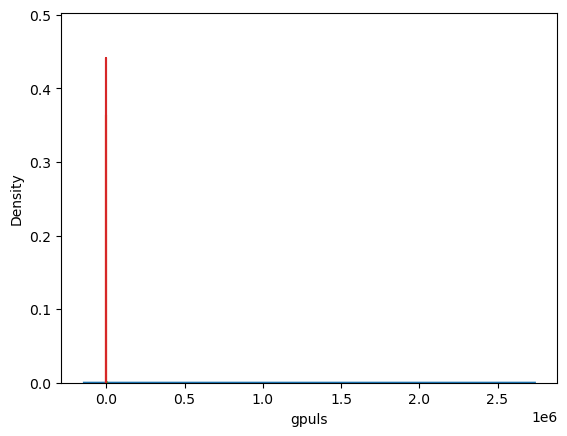

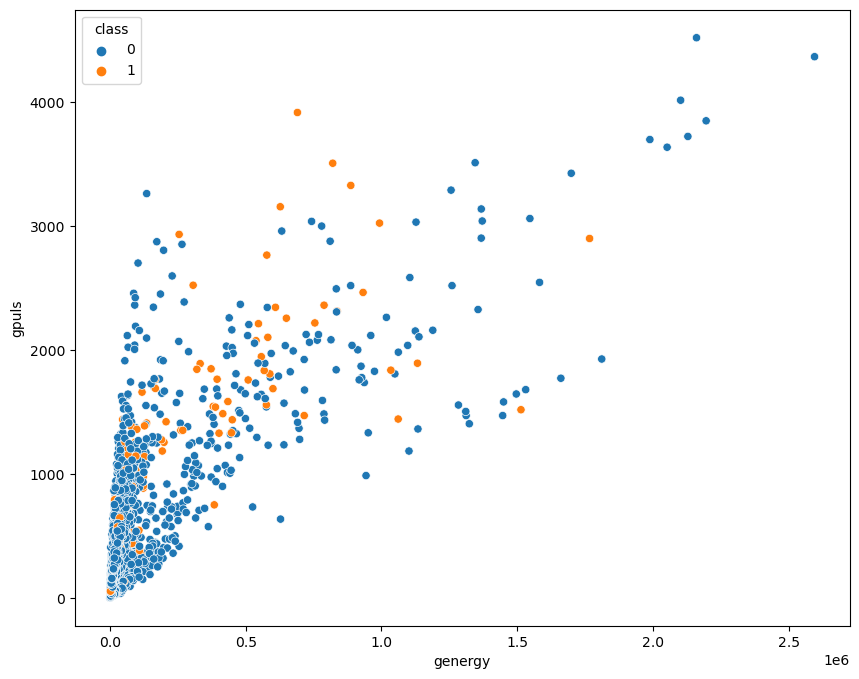

In [54]:

sns.distplot(df['genergy'], hist=True)

sns.distplot(np.log(df['genergy']), hist=True)

sns.distplot(df['gpuls'], hist=True)

sns.distplot(np.log(df['gpuls']), hist=True)

plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=df)

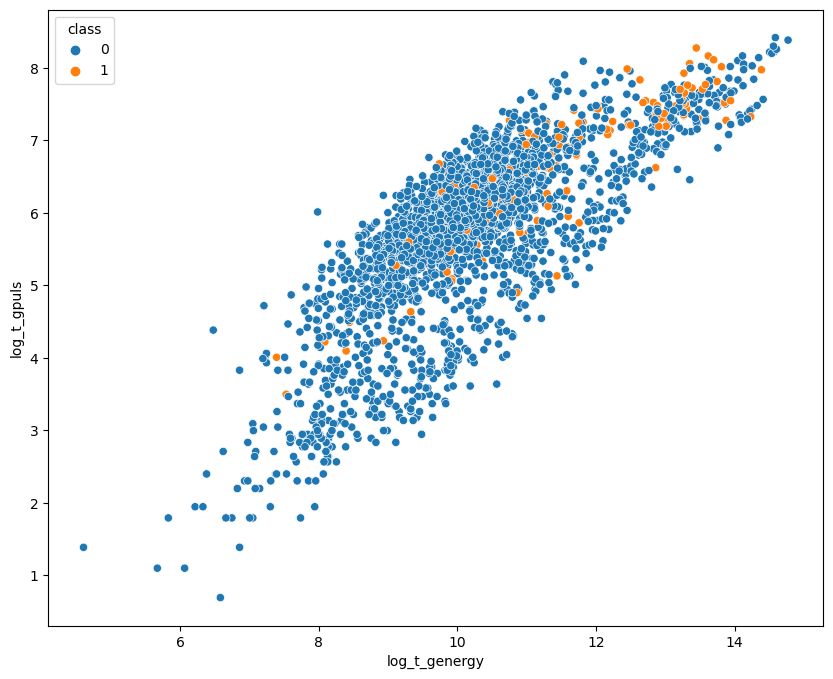

In [21]:

# Applying log transform

df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', hue='class', data=df)

df.drop(columns=['log_t_genergy', 'log_t_gpuls'], inplace=True)

<Axes: xlabel='gdenergy', ylabel='gdpuls'>

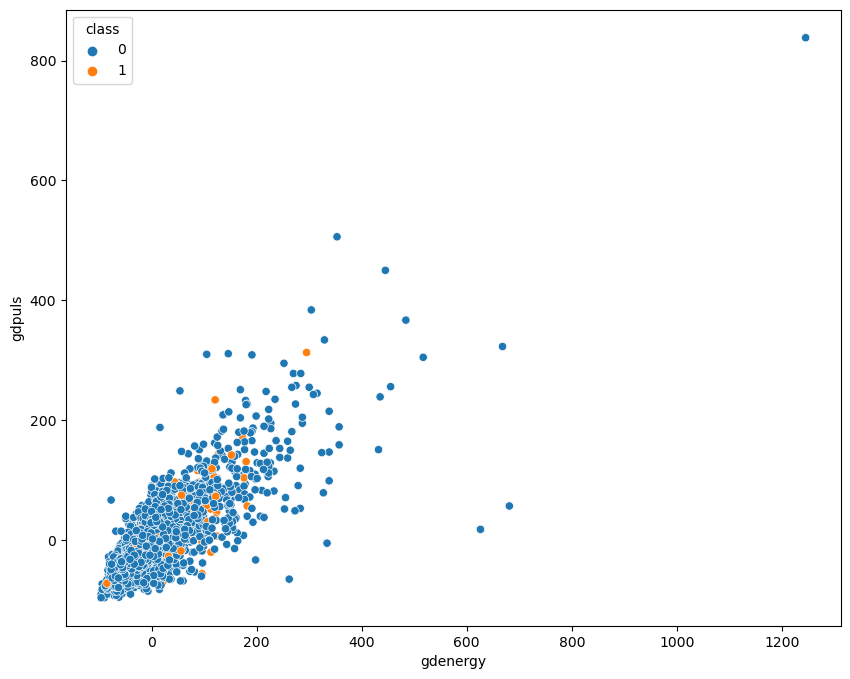

In [22]:

"""#### gdenergy and gdpuls"""
"""There are negative shifts in gdenergy and gdpuls because of which log transformation is not going to be the best choice. So, trying out square root transformation."""

plt.figure(figsize=[10, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', hue='class', data=df)


C:\Users\katen\AppData\Local\Temp\ipykernel_10156\3766577462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gdenergy'], hist=True)


<Axes: xlabel='gdenergy', ylabel='Density'>

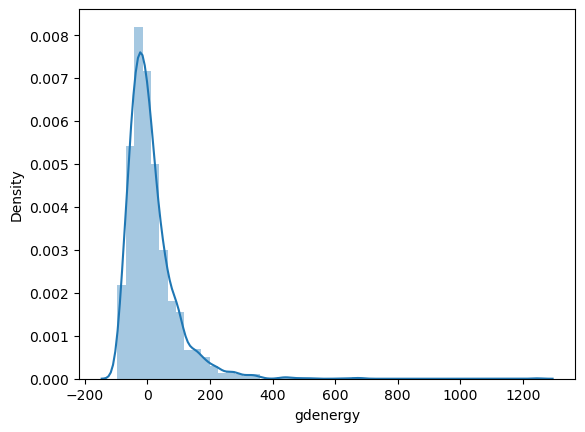

In [58]:
sns.distplot(df['gdenergy'], hist=True)
#"""There are some negative shifts here."""


C:\Users\katen\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\katen\AppData\Local\Temp\ipykernel_10156\3302418783.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['gdenergy']), hist=True)


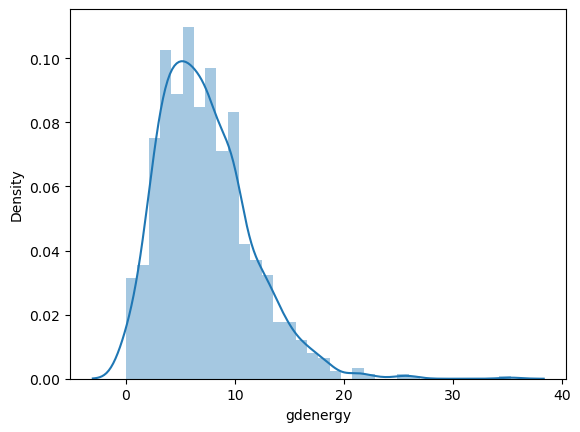

C:\Users\katen\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\katen\AppData\Local\Temp\ipykernel_10156\3302418783.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['gdpuls']), hist=True)


<Axes: xlabel='gdpuls', ylabel='Density'>

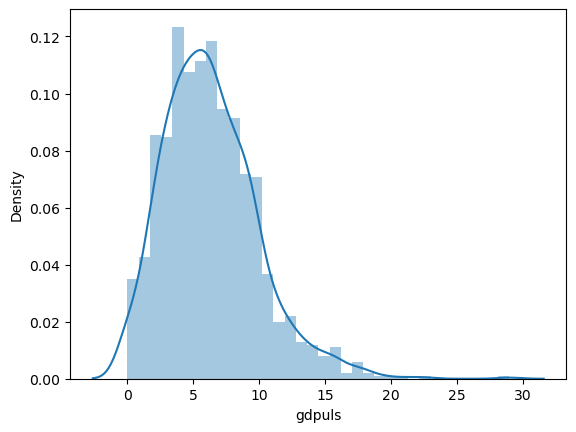

In [59]:

sns.distplot(np.sqrt(df['gdenergy']), hist=True)
plt.show()
sns.distplot(np.sqrt(df['gdpuls']), hist=True)

#""".. and trying out standard transformation"""

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\2094601350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['gdenergy']), hist=True)


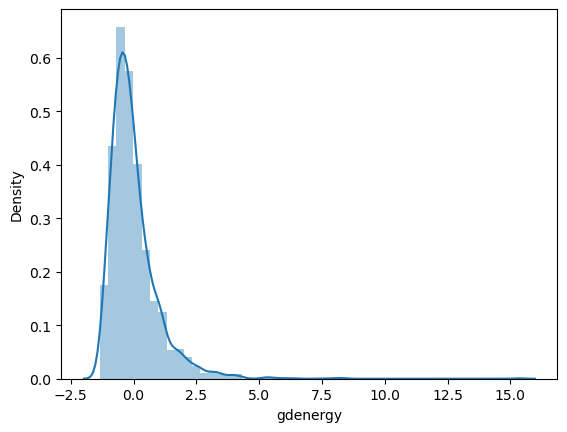

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\2094601350.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['gdpuls']), hist=True)


<Axes: xlabel='gdpuls', ylabel='Density'>

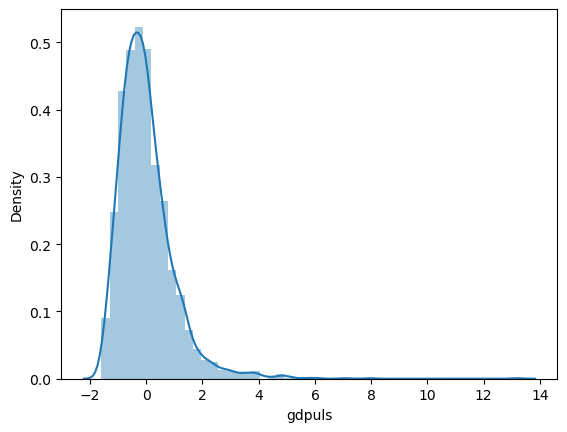

In [72]:

sns.distplot(stats.zscore(df['gdenergy']), hist=True)
plt.show()
sns.distplot(stats.zscore(df['gdpuls']), hist=True)

#  energy and maxenergy"""

C:\Users\katen\AppData\Local\Temp\ipykernel_23412\3106560787.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['energy'], hist=True)


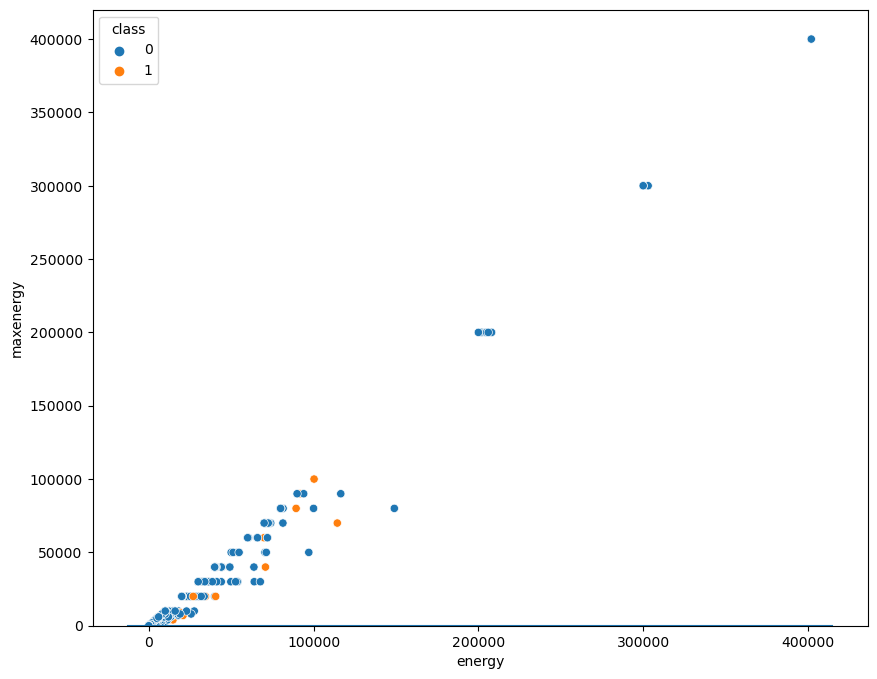

C:\Users\katen\AppData\Local\Temp\ipykernel_23412\3106560787.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['maxenergy'], hist=True)


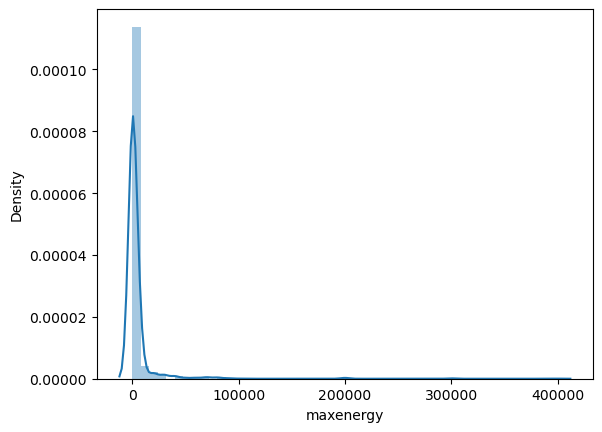

In [23]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='energy', y='maxenergy', hue='class', data=df)

"""A strong linear relationship is here betwen the two features."""

sns.distplot(df['energy'], hist=True)
plt.show()
sns.distplot(df['maxenergy'], hist=True)
plt.show()


In [74]:
"""There is a lot of zeroes in this feature. Therefore, using zscore again to check the distribution."""


'There is a lot of zeroes in this feature. Therefore, using zscore again to check the distribution.'

C:\Users\katen\AppData\Local\Temp\ipykernel_23412\2076198150.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['energy']), hist=True)


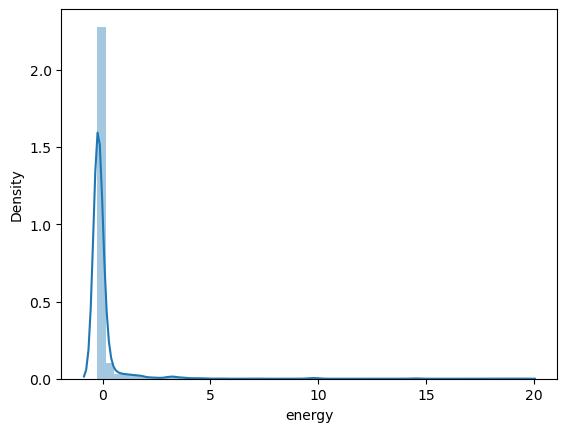

C:\Users\katen\AppData\Local\Temp\ipykernel_23412\2076198150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stats.zscore(df['maxenergy']), hist=True)


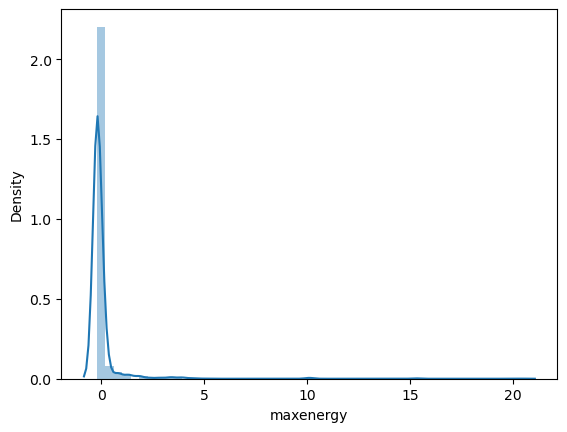

(2.1998227113315797e-17, -1.0999113556657898e-17)

In [24]:
sns.distplot(stats.zscore(df['energy']), hist=True)
plt.show()
sns.distplot(stats.zscore(df['maxenergy']), hist=True)
plt.show()

stats.zscore(df['energy']).mean(), stats.zscore(df['maxenergy']).mean()


In [25]:
"""Trying log transformation after adding a constant 1"""


'Trying log transformation after adding a constant 1'

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\1280155207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['energy']+1), hist=True)


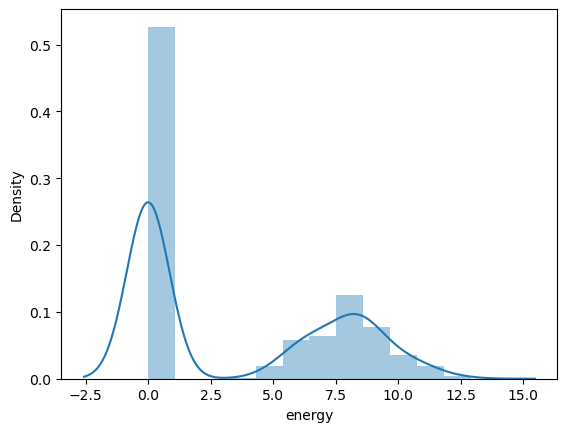

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\1280155207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['maxenergy']+1), hist=True)


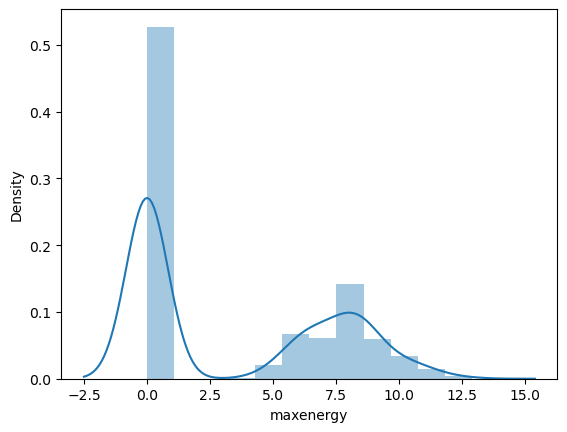

In [77]:

sns.distplot(np.log(df['energy']+1), hist=True)
plt.show()
sns.distplot(np.log(df['maxenergy']+1), hist=True)
plt.show()


"""For energy and maxenergy, there is little differences in the distributions as in the plots and there is almost 100% correlation in the data - so I would drop maxenergy and keep energy only. I would translate using a constant 1 and then use log transformation on energy.


In [26]:

def shifted_log_func(df_col):
    return np.log(1 + df_col)

dict_num_cols_trnsfm = {'genergy': np.log,
                        'gpuls' : np.log,
                        'gdenergy': stats.zscore,
                        'gdenergy': stats.zscore, 
                        'energy': shifted_log_func}

for col_names, transfm_func in dict_num_cols_trnsfm.items():
    df['scaled_' + col_names] = transfm_func(df[col_names])
df.drop(columns=col_list_numerical, inplace=True)
df.head()

df[[col for col in df.columns if 'scaled_' in col]].describe()


scaled_genergy  scaled_gpuls  scaled_gdenergy  scaled_energy
count     2584.000000   2584.000000     2.584000e+03    2584.000000
mean        10.221063      5.761759    -2.199823e-17       3.481643
std          1.393919      1.173926     1.000194e+00       4.117081
min          4.605170      0.693147    -1.349577e+00       0.000000
25%          9.363919      5.247024    -6.148645e-01       0.000000
50%         10.145845      5.937536    -2.288290e-01       0.000000
75%         10.874880      6.505784     3.190922e-01       7.863651
max         14.769348      8.415825     1.534957e+01      12.904210

In [83]:
df['nbumps6'].nunique()

1

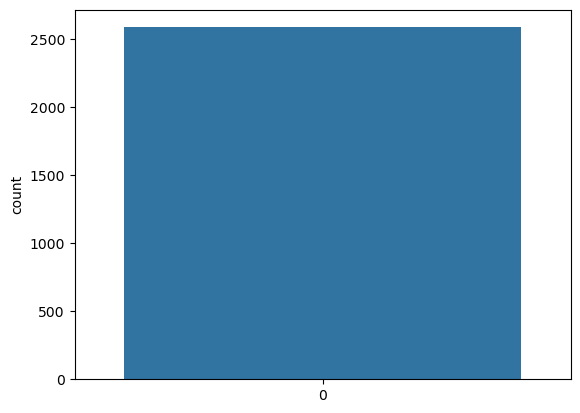

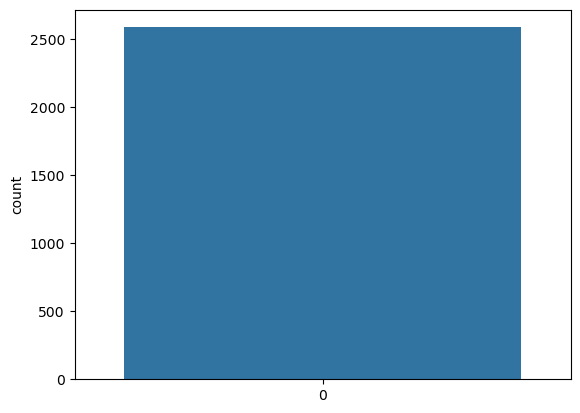

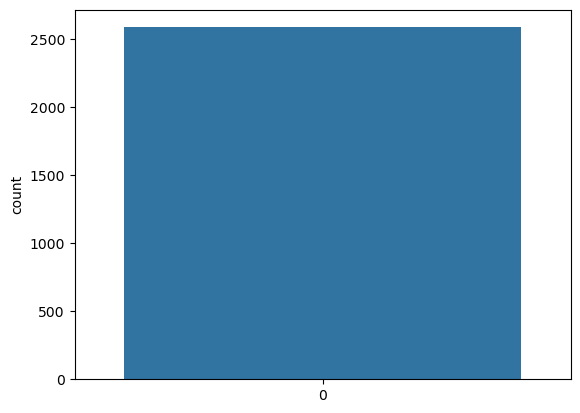

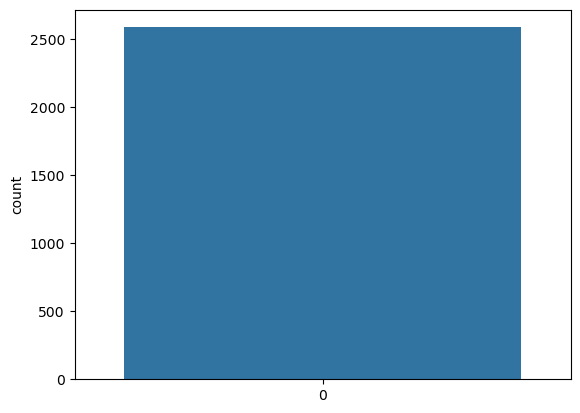

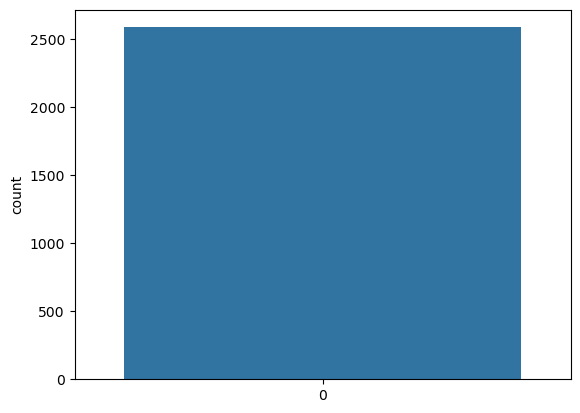

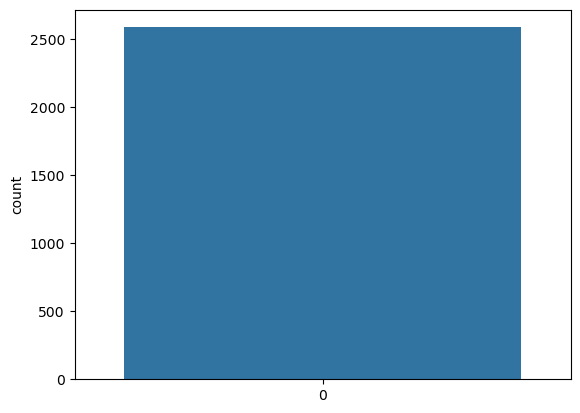

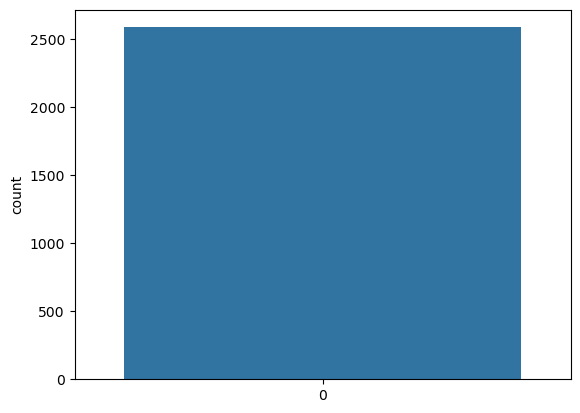

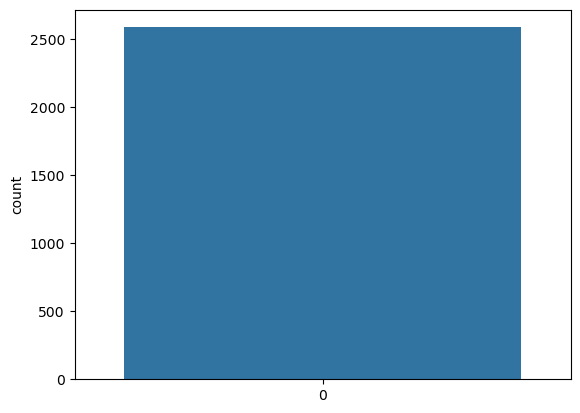

In [80]:

"""### Discrete Features"""

for col in col_list_discrete:
    sns.countplot(df[col])
    plt.show()


In [81]:
"""Since nbumps 6 , 7 & 89 contain zero, I will drop them as they have no information."""


'Since nbumps 6 , 7 & 89 contain zero, I will drop them as they have no information.'

In [27]:
df.drop(columns=['nbumps6', 'nbumps7', 'nbumps89'], inplace=True)


In [28]:

col_list_discrete = list(set(col_list_discrete) - set(['nbumps6', 'nbumps7', 'nbumps89']))
col_list_discrete

['nbumps4', 'nbumps2', 'nbumps', 'nbumps5', 'nbumps3']

In [29]:

for each_col in col_list_discrete:
    data_crosstab = pd.crosstab(df[each_col], df[label], colnames=['class'])
    print(data_crosstab)
    print('-----')


class       0    1
nbumps4           
0.0      2278  148
1.0       123   20
2.0        12    1
3.0         1    1
-----
class       0   1
nbumps2          
0.0      1832  69
1.0       399  56
2.0       122  29
3.0        47  11
4.0         8   4
5.0         5   1
8.0         1   0
-----
class      0   1
nbumps          
0.0     1424  40
1.0      567  31
2.0      208  37
3.0       96  31
4.0       59  10
5.0       30   8
6.0       19   9
7.0        3   2
8.0        6   1
9.0        2   1
-----
class       0    1
nbumps5           
0.0      2403  169
1.0        11    1
-----
class       0   1
nbumps3          
0.0      1806  73
1.0       442  55
2.0       115  25
3.0        35   7
4.0        12   8
5.0         3   2
7.0         1   0
-----


## Correlations between features and the target"""


In [30]:
df_corr = df.corr()


In [31]:
df_corr

nbumps   nbumps2   nbumps3   nbumps4   nbumps5  \
nbumps                1.000000  0.804978  0.803364  0.395052  0.069613   
nbumps2               0.804978  1.000000  0.350724  0.161296 -0.005251   
nbumps3               0.803364  0.350724  1.000000  0.175301  0.046498   
nbumps4               0.395052  0.161296  0.175301  1.000000 -0.016580   
nbumps5               0.069613 -0.005251  0.046498 -0.016580  1.000000   
class                 0.248144  0.201381  0.205327  0.075458  0.004834   
seismic_enc_0         0.127171  0.066301  0.068249  0.241264  0.021627   
seismoacoustic_enc_0  0.017083  0.023355  0.005500  0.001981  0.012021   
shift_enc_0          -0.311292 -0.278907 -0.213955 -0.151681 -0.003293   
ghazard_enc_0        -0.051151 -0.014489 -0.070216 -0.017897  0.012241   
scaled_genergy        0.413645  0.303243  0.342068  0.224714  0.025477   
scaled_gpuls          0.283790  0.213291  0.209652  0.202308  0.043079   
scaled_gdenergy       0.030039  0.041246 -0.012189  0.036916  0.123229   
scaled_energy         0.782024  0.543103  0.669248  0.416245  0.146706   

                         class  seismic_enc_0  seismoacoustic_enc_0  \
nbumps                0.248144       0.127171              0.017083   
nbumps2               0.201381       0.066301              0.023355   
nbumps3               0.205327       0.068249              0.005500   
nbumps4               0.075458       0.241264              0.001981   
nbumps5               0.004834       0.021627              0.012021   
class                 1.000000       0.090574              0.008251   
seismic_enc_0         0.090574       1.000000              0.058114   
seismoacoustic_enc_0  0.008251       0.058114              1.000000   
shift_enc_0          -0.142079      -0.268667             -0.081082   
ghazard_enc_0        -0.017744       0.097272              0.460687   
scaled_genergy        0.193425       0.160985              0.096309   
scaled_gpuls          0.166411       0.336464              0.174608   
scaled_gdenergy       0.002957       0.142308              0.184654   
scaled_energy         0.194623       0.126556              0.006161   

                      shift_enc_0  ghazard_enc_0  scaled_genergy  \
nbumps                  -0.311292      -0.051151        0.413645   
nbumps2                 -0.278907      -0.014489        0.303243   
nbumps3                 -0.213955      -0.070216        0.342068   
nbumps4                 -0.151681      -0.017897        0.224714   
nbumps5                 -0.003293       0.012241        0.025477   
class                   -0.142079      -0.017744        0.193425   
seismic_enc_0           -0.268667       0.097272        0.160985   
seismoacoustic_enc_0    -0.081082       0.460687        0.096309   
shift_enc_0              1.000000      -0.054115       -0.511894   
ghazard_enc_0           -0.054115       1.000000        0.045130   
scaled_genergy          -0.511894       0.045130        1.000000   
scaled_gpuls            -0.628288       0.158325        0.775962   
scaled_gdenergy         -0.097382       0.317974        0.252026   
scaled_energy           -0.284306      -0.034297        0.451352   

                      scaled_gpuls  scaled_gdenergy  scaled_energy  
nbumps                    0.283790         0.030039       0.782024  
nbumps2                   0.213291         0.041246       0.543103  
nbumps3                   0.209652        -0.012189       0.669248  
nbumps4                   0.202308         0.036916       0.416245  
nbumps5                   0.043079         0.123229       0.146706  
class                     0.166411         0.002957       0.194623  
seismic_enc_0             0.336464         0.142308       0.126556  
seismoacoustic_enc_0      0.174608         0.184654       0.006161  
shift_enc_0              -0.628288        -0.097382      -0.284306  
ghazard_enc_0             0.158325         0.317974      -0.034297  
scaled_genergy            0.775962         0.252026       0.451352 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'nbumps'),
  Text(0, 1.5, 'nbumps2'),
  Text(0, 2.5, 'nbumps3'),
  Text(0, 3.5, 'nbumps4'),
  Text(0, 4.5, 'nbumps5'),
  Text(0, 5.5, 'class'),
  Text(0, 6.5, 'seismic_enc_0'),
  Text(0, 7.5, 'seismoacoustic_enc_0'),
  Text(0, 8.5, 'shift_enc_0'),
  Text(0, 9.5, 'ghazard_enc_0'),
  Text(0, 10.5, 'scaled_genergy'),
  Text(0, 11.5, 'scaled_gpuls'),
  Text(0, 12.5, 'scaled_gdenergy'),
  Text(0, 13.5, 'scaled_energy')])

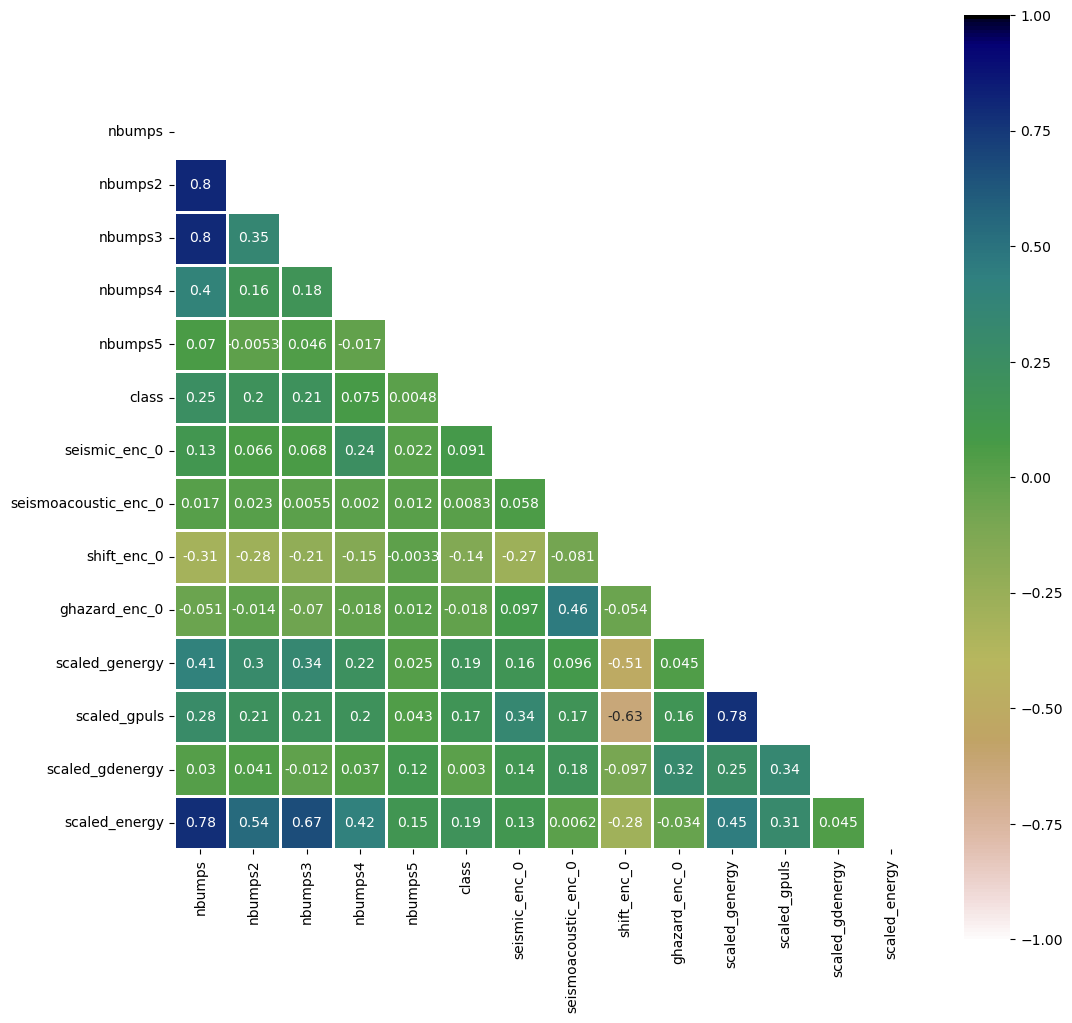

In [32]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=[12, 12])
sns.heatmap(data=df_corr, mask=mask, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [37]:
df.describe()

nbumps      nbumps2      nbumps3      nbumps4      nbumps5  \
count  2584.000000  2584.000000  2584.000000  2584.000000  2584.000000   
mean      0.859520     0.393576     0.392802     0.067724     0.004644   
std       1.364616     0.783772     0.769710     0.279059     0.068001   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     0.000000     0.000000   
max       9.000000     8.000000     7.000000     3.000000     1.000000   

             class  seismic_enc_0  seismoacoustic_enc_0  shift_enc_0  \
count  2584.000000    2584.000000           2584.000000  2584.000000   
mean      0.065789       0.349071              0.407121     0.356424   
std       0.247962       0.476769              0.527857     0.479035   
min       0.000000       0.000000              0.000000     0.000000   
25%       0.000000       0.000000              0.000000     0.000000   
50%       0.000000       0.000000              0.000000     0.000000   
75%       0.000000       1.000000              1.000000     1.000000   
max       1.000000       1.000000              2.000000     1.000000   

       ghazard_enc_0  scaled_genergy  scaled_gpuls  scaled_gdenergy  \
count    2584.000000     2584.000000   2584.000000     2.584000e+03   
mean        0.105263       10.221063      5.761759    -2.199823e-17   
std         0.342707        1.393919      1.173926     1.000194e+00   
min         0.000000        4.605170      0.693147    -1.349577e+00   
25%         0.000000        9.363919      5.247024    -6.148645e-01   
50%         0.000000       10.145845      5.937536    -2.288290e-01   
75%         0.000000       10.874880      6.505784     3.190922e-01   
max         2.000000       14.769348      8.415825     1.534957e+01   

       scaled_energy  
count    2584.000000  
mean        3.481643  
std         4.117081  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         7.863651  
max        12.904210

In [90]:
"""## Splitting Traning and Test data using Stratified Shuffle Split"""


'## Splitting Traning and Test data using Stratified Shuffle Split'

In [91]:

X_cols = list(set(df.columns) - set([label]))
X_cols

['ghazard_enc_0',
 'seismic_enc_0',
 'scaled_genergy',
 'nbumps3',
 'scaled_energy',
 'shift_enc_0',
 'scaled_gdenergy',
 'nbumps2',
 'scaled_gpuls',
 'nbumps5',
 'seismoacoustic_enc_0',
 'nbumps4',
 'nbumps']

In [96]:

X = df[list(set(df.columns) - set([label]))].values
y = df[label]
X.shape, y.shape

type(X), type(y)

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

In [97]:

for train_idx, test_idx in stratified_split.split(X, y):
    print(len(train_idx))
    print(len(test_idx))
    y_train= y[train_idx]
    X_train = X[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

len(X_train), len(y_train), len(X_test), len(y_test)

print("Training Set Target Class Distribution:")
print(y_train.value_counts()/len(y_train))
print("Test Set Target Class Distribution:")
print(y_test.value_counts()/len(y_test))


2067
517
Training Set Target Class Distribution:
0    0.934204
1    0.065796
Name: class, dtype: float64
Test Set Target Class Distribution:
0    0.934236
1    0.065764
Name: class, dtype: float64


In [98]:

X_train = pd.DataFrame(X_train, columns=X_cols)
X_test = pd.DataFrame(X_test, columns=X_cols)

In [100]:
nbumps_indices = [X_cols.index(f) for f in X_cols if 'nbumps' in f]
nbumps_indices

[3, 7, 9, 11, 12]

In [102]:
import theano.tensor as tt


C:\Users\katen\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\katen\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\katen\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [augmented_X, intercept, other_coeffs, nbumps_coeffs, nbumps_sigma, nbumps_mean]


Sampling 4 chains for 30 tune and 100 draw iterations (120 + 400 draws total) took 11184 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
C:\Users\katen\AppData\Local\Temp\ipykernel_10156\2040929682.py:44: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\katen\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying 

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
nbumps_mean         -0.174  0.403  -0.982    0.585      0.020    0.018   
nbumps_coeffs[0]     0.052  0.242  -0.415    0.485      0.012    0.009   
nbumps_coeffs[1]     0.119  0.032   0.059    0.173      0.001    0.001   
nbumps_coeffs[2]    -1.171  0.255  -1.634   -0.695      0.011    0.008   
nbumps_coeffs[3]     0.036  0.101  -0.160    0.197      0.005    0.004   
...                    ...    ...     ...      ...        ...      ...   
augmented_X[99, 9]  -0.003  1.020  -1.812    1.944      0.032    0.067   
augmented_X[99, 10] -0.013  0.935  -1.757    1.741      0.036    0.044   
augmented_X[99, 11] -0.060  1.025  -1.758    1.933      0.039    0.049   
augmented_X[99, 12] -0.017  0.949  -1.733    1.757      0.043    0.067   
nbumps_sigma         0.774  0.431   0.260    1.458      0.024    0.017   

                     ess_bulk  ess_tail  r_hat  
nbumps_mean             466.0     308.0   1.01  
nbumps_coeffs[0]        406.0     407.0   1.01  
nbumps_coeffs[1]        475.0     299.0   1.01  
nbumps_coeffs[2]        494.0     397.0   1.00  
nbumps_coeffs[3]        465.0     370.0   1.00  
...                       ...       ...    ...  
augmented_X[99, 9]      914.0     248.0   1.04  
augmented_X[99, 10]     651.0     309.0   1.00  
augmented_X[99, 11]     698.0     306.0   1.00  
augmented_X[99, 12]     513.0     313.0   1.01  
nbumps_sigma            407.0     369.0   1.00  

[1316 rows x 9 columns]

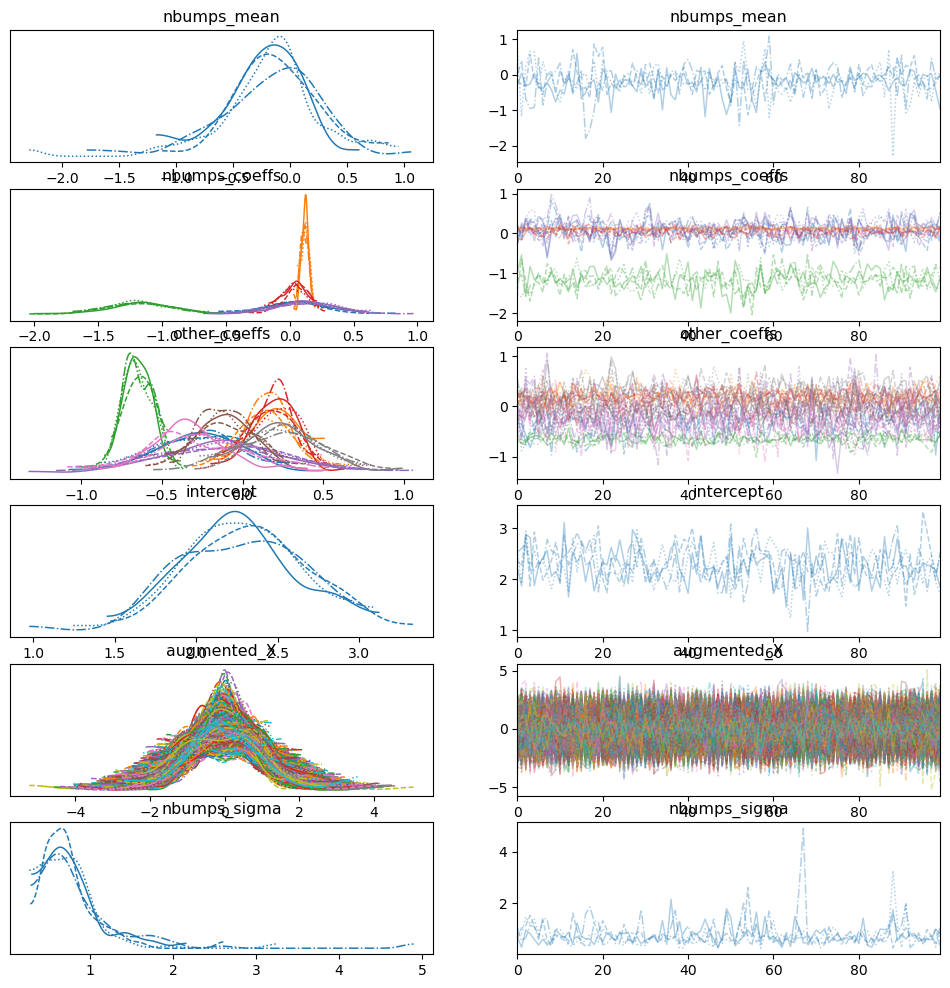

In [105]:
import pymc3 as pm
import numpy as np
import theano.tensor as tt

# Assuming X_train, y_train, and nbumps_indices are defined properly
# Calculate the log odds for the intercept prior
minority_count = np.sum(y_train == 1)
majority_count = np.sum(y_train == 0)
log_odds = np.log(minority_count / majority_count)

with pm.Model() as logistic_model:
    # Hierarchical priors for the 'nbumps' group of features
    nbumps_mean = pm.Normal('nbumps_mean', mu=0, sigma=10)
    nbumps_sigma = pm.HalfCauchy('nbumps_sigma', beta=2)
    nbumps_coeffs = pm.Normal('nbumps_coeffs', mu=nbumps_mean, sigma=nbumps_sigma, shape=len(nbumps_indices))
    
    # Priors for other coefficients
    other_coeffs = pm.Normal('other_coeffs', mu=0, sigma=10, shape=X_train.shape[1] - len(nbumps_indices))
    
    # Combine all coefficients, placing the hierarchical ones at the appropriate positions
    coeffs = tt.concatenate([other_coeffs[:nbumps_indices[0]], 
                             nbumps_coeffs, 
                             other_coeffs[nbumps_indices[0]:]])

    # Intercept prior adjusted based on the imbalance
    intercept = pm.Normal('intercept', mu=log_odds, sigma=10)

    # Expected value of outcome, p(y=1)
    logits = intercept + pm.math.dot(X_train, coeffs)
    
    # Likelihood (sampling distribution) of observations, augmented for imbalance
    outcome_obs = pm.Bernoulli('outcome_obs', logit_p=logits, observed=y_train)

    # Data augmentation for minority class
    num_augmented = 100  # number of synthetic data points to add
    augmented_X = pm.Normal('augmented_X', mu=0, sigma=1, shape=(num_augmented, X_train.shape[1]))
    augmented_logits = intercept + pm.math.dot(augmented_X, coeffs)
    augmented_outcome = pm.Bernoulli('augmented_outcome', logit_p=augmented_logits, observed=np.ones(num_augmented))

    # Posterior inference
    trace = pm.sample(100, tune=30, target_accept=0.95)

# Checking the trace for convergence and summary for results
pm.traceplot(trace)
pm.summary(trace)


In [114]:
pm.summary(trace)


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\katen\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
nbumps_mean         -0.174  0.403  -0.982    0.585      0.020    0.018   
nbumps_coeffs[0]     0.052  0.242  -0.415    0.485      0.012    0.009   
nbumps_coeffs[1]     0.119  0.032   0.059    0.173      0.001    0.001   
nbumps_coeffs[2]    -1.171  0.255  -1.634   -0.695      0.011    0.008   
nbumps_coeffs[3]     0.036  0.101  -0.160    0.197      0.005    0.004   
...                    ...    ...     ...      ...        ...      ...   
augmented_X[99, 9]  -0.003  1.020  -1.812    1.944      0.032    0.067   
augmented_X[99, 10] -0.013  0.935  -1.757    1.741      0.036    0.044   
augmented_X[99, 11] -0.060  1.025  -1.758    1.933      0.039    0.049   
augmented_X[99, 12] -0.017  0.949  -1.733    1.757      0.043    0.067   
nbumps_sigma         0.774  0.431   0.260    1.458      0.024    0.017   

                     ess_bulk  ess_tail  r_hat  
nbumps_mean             466.0     308.0   1.01  
nbumps_coeffs[0]        406.0     407.0   1.01  
nbumps_coeffs[1]        475.0     299.0   1.01  
nbumps_coeffs[2]        494.0     397.0   1.00  
nbumps_coeffs[3]        465.0     370.0   1.00  
...                       ...       ...    ...  
augmented_X[99, 9]      914.0     248.0   1.04  
augmented_X[99, 10]     651.0     309.0   1.00  
augmented_X[99, 11]     698.0     306.0   1.00  
augmented_X[99, 12]     513.0     313.0   1.01  
nbumps_sigma            407.0     369.0   1.00  

[1316 rows x 9 columns]

In [106]:
# Posterior predictive checks
with logistic_model:
    ppc = pm.sample_posterior_predictive(trace, samples=500)

# Extracting mean coefficient values from the trace
mean_other_coeffs = np.mean(trace['other_coeffs'], axis=0)
mean_nbumps_coeffs = np.mean(trace['nbumps_coeffs'], axis=0)
mean_intercept = np.mean(trace['intercept'])

# Preparing the coefficients array
mean_coeffs = np.concatenate([mean_other_coeffs, mean_nbumps_coeffs])

# Making predictions on the test set
test_logits = mean_intercept + np.dot(X_test, mean_coeffs)
test_probs = 1 / (1 + np.exp(-test_logits))
test_predictions = (test_probs > 0.5).astype(int)

# Evaluating model performance
accuracy = accuracy_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_probs)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.9342359767891683
ROC AUC: 0.34752161734258924


In [107]:
!pip install arviz  # For better plotting support in pymc3


ERROR: Invalid requirement: '#'


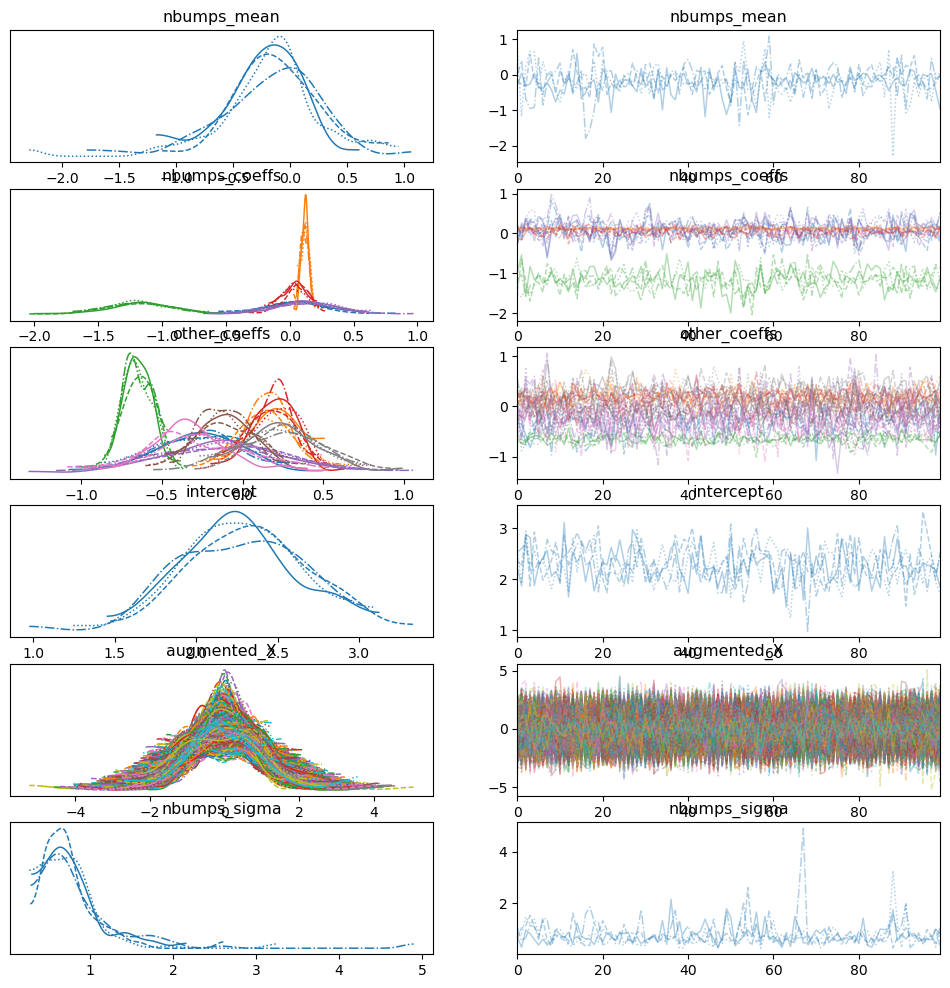

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\katen\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


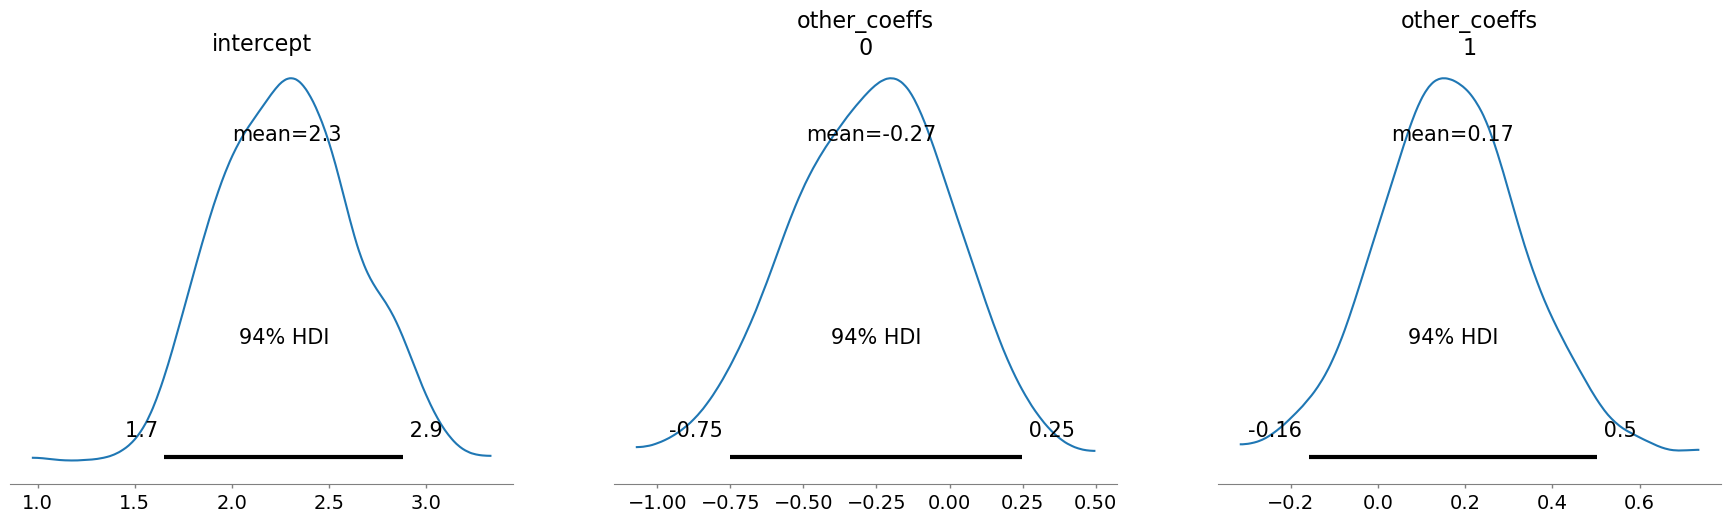

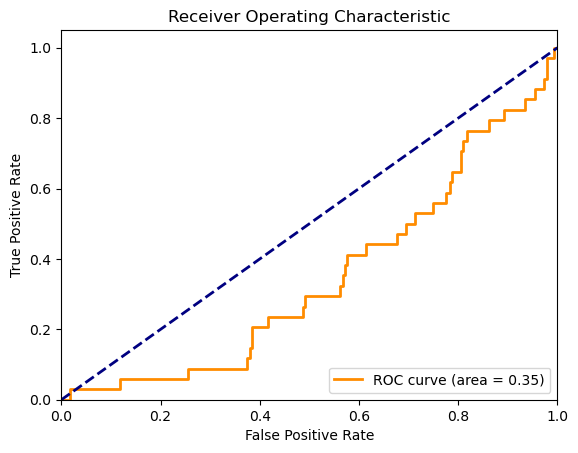

In [108]:
huOimport matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import arviz as az

# Assuming the 'logistic_model' and 'trace' are already defined and generated from the previous steps

# Plot the trace of the sampling for the coefficients and the intercept
with logistic_model:
    az.plot_trace(trace)
    plt.show()  # Display the trace plot

# Plot the posterior distributions of a few selected parameters
# Let's plot the intercept and the first two coefficients as an example
pm.plot_posterior(trace, var_names=['intercept', 'other_coeffs'], coords={'other_coeffs_dim_0': [0, 1]})
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, test_probs)
roc_auc = roc_auc_score(y_test, test_probs)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [109]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import pandas as pd

# Example feature matrix X
X = X_train  # replace with your actual seismic data features

Bgmm = BayesianGaussianMixture(n_components=6, covariance_type='full',
                               weight_concentration_prior=0.01, max_iter=200)
Bgmm.fit(X)

# Predict the probabilities of each component (cluster)
probs = Bgmm.predict_proba(X)

# Summarize the results to see the distribution across clusters
results = np.sum(probs, axis=0)
results_df = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1, 7))

print(results_df)


   # of individuals
1             459.0
2              23.0
3             707.0
4             111.0
5             644.0
6             123.0


In [113]:
X_cols1 = ['ghazard_enc_0',
 'seismic_enc_0',
 'scaled_genergy',
 'nbumps3',
 'shift_enc_0',
 'nbumps2',
 'scaled_gpuls',
 'nbumps5',
 'seismoacoustic_enc_0',
 'nbumps4',
 'nbumps']

In [110]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [111]:
import pickle

# Save the trace
with open('trace.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model, 'trace': trace}, buff)

# Save the model summary
summary = pm.summary(trace)
summary.to_csv('model_summary.csv')


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\katen\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


----------------------------------------------------------- 
# Trying to solve

In [157]:
X_cols1

['ghazard_enc_0',
 'seismic_enc_0',
 'scaled_genergy',
 'nbumps3',
 'shift_enc_0',
 'nbumps2',
 'scaled_gpuls',
 'nbumps5',
 'seismoacoustic_enc_0',
 'nbumps4',
 'nbumps']

In [156]:

X_train = pd.DataFrame(X_train, columns=X_cols1)
X_test = pd.DataFrame(X_test, columns=X_cols1)

C:\Users\katen\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\katen\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\katen\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, other_coeffs, nbumps_coeffs, nbumps_sigma, nbumps_mean]


Sampling 4 chains for 20 tune and 200 draw iterations (80 + 800 draws total) took 16908 seconds.
The acceptance probability does not match the target. It is 0.9992992610325551, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9993864486367617, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\katen\AppData\Local\Temp\ipykernel_10156\3867857319.py:44: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `py

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
nbumps_mean      -0.124  0.577  -1.316    0.900      0.095    0.067      47.0   
nbumps_coeffs[0] -0.182  0.830  -1.480    1.896      0.186    0.134      29.0   
nbumps_coeffs[1] -0.359  0.356  -0.969    0.254      0.033    0.023     122.0   
nbumps_coeffs[2] -0.130  0.833  -1.422    1.926      0.185    0.132      29.0   
nbumps_coeffs[3]  0.208  0.192  -0.110    0.613      0.010    0.007     385.0   
nbumps_coeffs[4] -0.148  0.775  -1.533    1.548      0.105    0.075      68.0   
other_coeffs[0]  -0.447  0.392  -1.237    0.237      0.020    0.014     369.0   
other_coeffs[1]   0.409  0.242  -0.006    0.797      0.017    0.012     359.0   
other_coeffs[2]   0.229  0.129  -0.025    0.460      0.012    0.008     127.0   
other_coeffs[3]  -0.079  0.205  -0.466    0.276      0.007    0.010     962.0   
other_coeffs[4]  -0.750  0.882  -2.349    1.112      0.192    0.137      28.0   
other_coeffs[5]   0.537  0.823  -1.528    1.812      0.183    0.131      29.0   
intercept        -6.872  0.971  -8.759   -5.321      0.126    0.090      84.0   
nbumps_sigma      0.621  0.537   0.009    1.507      0.064    0.045      53.0   

                  ess_tail  r_hat  
nbumps_mean           36.0   1.07  
nbumps_coeffs[0]      26.0   1.11  
nbumps_coeffs[1]     340.0   1.02  
nbumps_coeffs[2]      27.0   1.12  
nbumps_coeffs[3]     521.0   1.01  
nbumps_coeffs[4]      29.0   1.04  
other_coeffs[0]      409.0   1.01  
other_coeffs[1]      267.0   1.01  
other_coeffs[2]      187.0   1.04  
other_coeffs[3]      441.0   1.00  
other_coeffs[4]       26.0   1.11  
other_coeffs[5]       27.0   1.11  
intercept             32.0   1.06  
nbumps_sigma          50.0   1.06

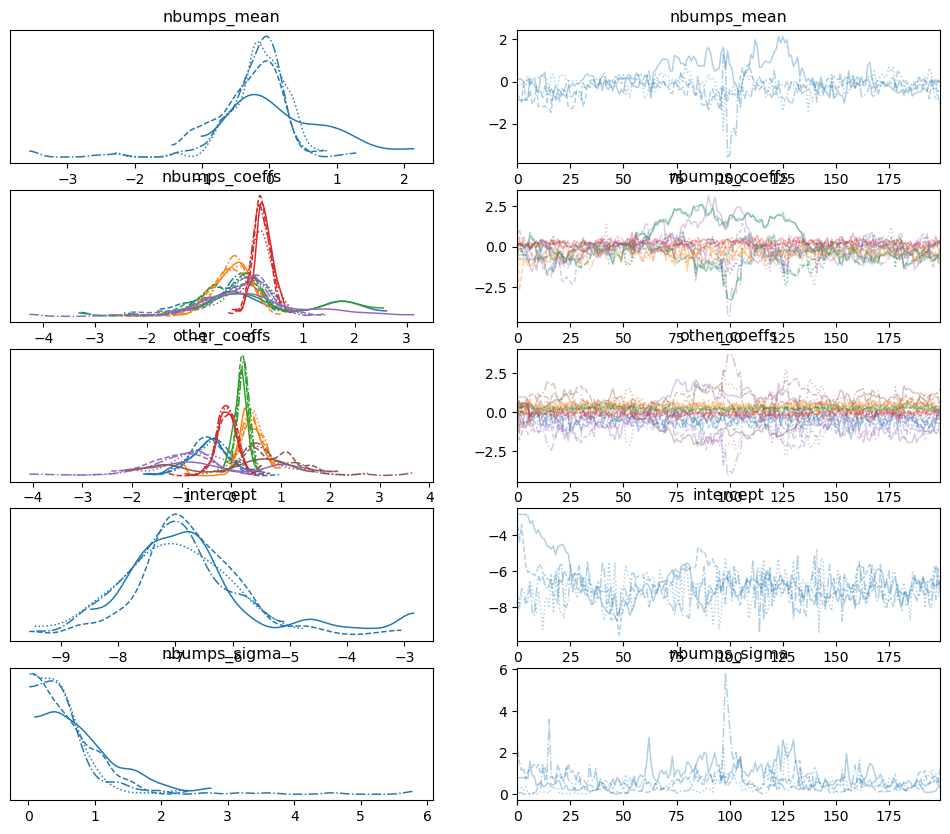

In [159]:
import pymc3 as pm
import numpy as np
import theano.tensor as tt

# Assuming X_train, y_train, and nbumps_indices are defined properly
# Calculate the log odds for the intercept prior
minority_count = np.sum(y_train == 1)
majority_count = np.sum(y_train == 0)
log_odds = np.log(minority_count / majority_count)

with pm.Model() as logistic_model:
    # Hierarchical priors for the 'nbumps' group of features
    nbumps_mean = pm.Normal('nbumps_mean', mu=0, sigma=10)
    nbumps_sigma = pm.HalfCauchy('nbumps_sigma', beta=2)
    nbumps_coeffs = pm.Normal('nbumps_coeffs', mu=nbumps_mean, sigma=nbumps_sigma, shape=len(nbumps_indices))
    
    # Priors for other coefficients
    other_coeffs = pm.Normal('other_coeffs', mu=0, sigma=10, shape=X_train.shape[1] - len(nbumps_indices))
    
    # Combine all coefficients, placing the hierarchical ones at the appropriate positions
    coeffs = tt.concatenate([other_coeffs[:nbumps_indices[0]], 
                             nbumps_coeffs, 
                             other_coeffs[nbumps_indices[0]:]])

    # Intercept prior adjusted based on the imbalance
    intercept = pm.Normal('intercept', mu=log_odds, sigma=10)

    # Expected value of outcome, p(y=1)
    logits = intercept + pm.math.dot(X_train, coeffs)
    
    # Likelihood (sampling distribution) of observations, augmented for imbalance
    outcome_obs = pm.Bernoulli('outcome_obs', logit_p=logits, observed=y_train)

    # Data augmentation for minority class
    #num_augmented = 100  # number of synthetic data points to add
    #augmented_X = pm.Normal('augmented_X', mu=0, sigma=1, shape=(num_augmented, X_train.shape[1]))
    #augmented_logits = intercept + pm.math.dot(augmented_X, coeffs)
    #augmented_outcome = pm.Bernoulli('augmented_outcome', logit_p=augmented_logits, observed=np.ones(num_augmented))

    # Posterior inference
    trace = pm.sample(200, tune=20, target_accept=0.95)

# Checking the trace for convergence and summary for results
pm.traceplot(trace)
pm.summary(trace)


In [160]:
# Posterior predictive checks
with logistic_model:
    ppc = pm.sample_posterior_predictive(trace, samples=500)

# Extracting mean coefficient values from the trace
mean_other_coeffs = np.mean(trace['other_coeffs'], axis=0)
mean_nbumps_coeffs = np.mean(trace['nbumps_coeffs'], axis=0)
mean_intercept = np.mean(trace['intercept'])

# Preparing the coefficients array
mean_coeffs = np.concatenate([mean_other_coeffs, mean_nbumps_coeffs])

# Making predictions on the test set
test_logits = mean_intercept + np.dot(X_test, mean_coeffs)
test_probs = 1 / (1 + np.exp(-test_logits))
test_predictions = (test_probs > 0.5).astype(int)

# Evaluating model performance
accuracy = accuracy_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_probs)

print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')

C:\Users\katen\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Accuracy: 0.9342359767891683
ROC AUC: 0.6773839970770917


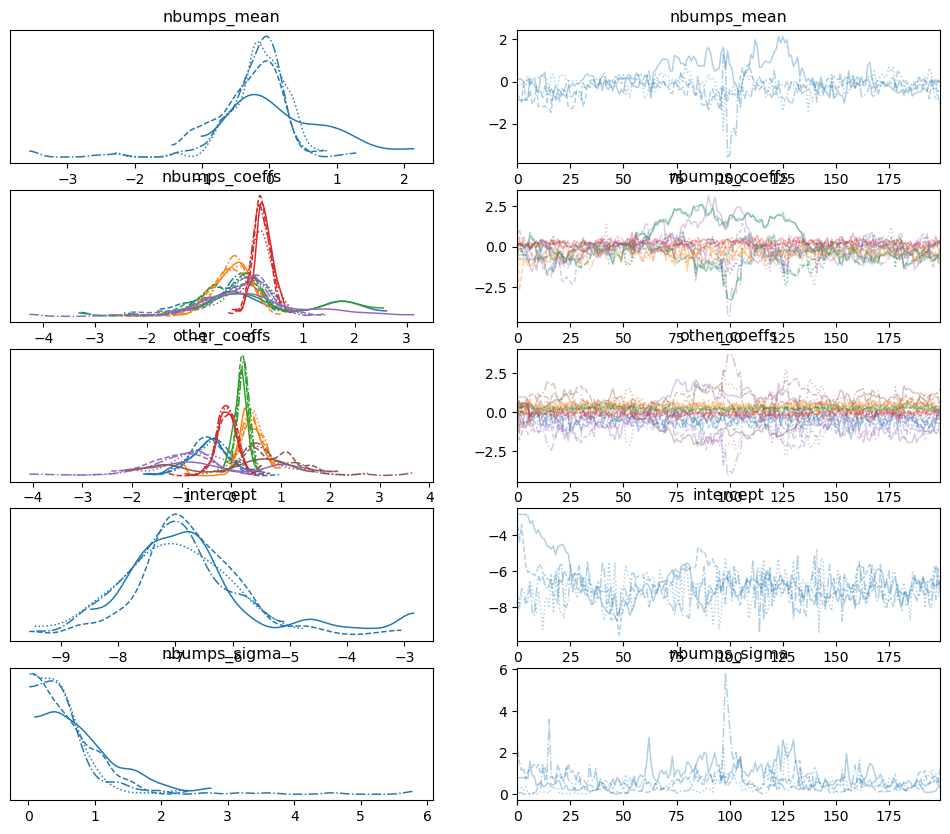

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\katen\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


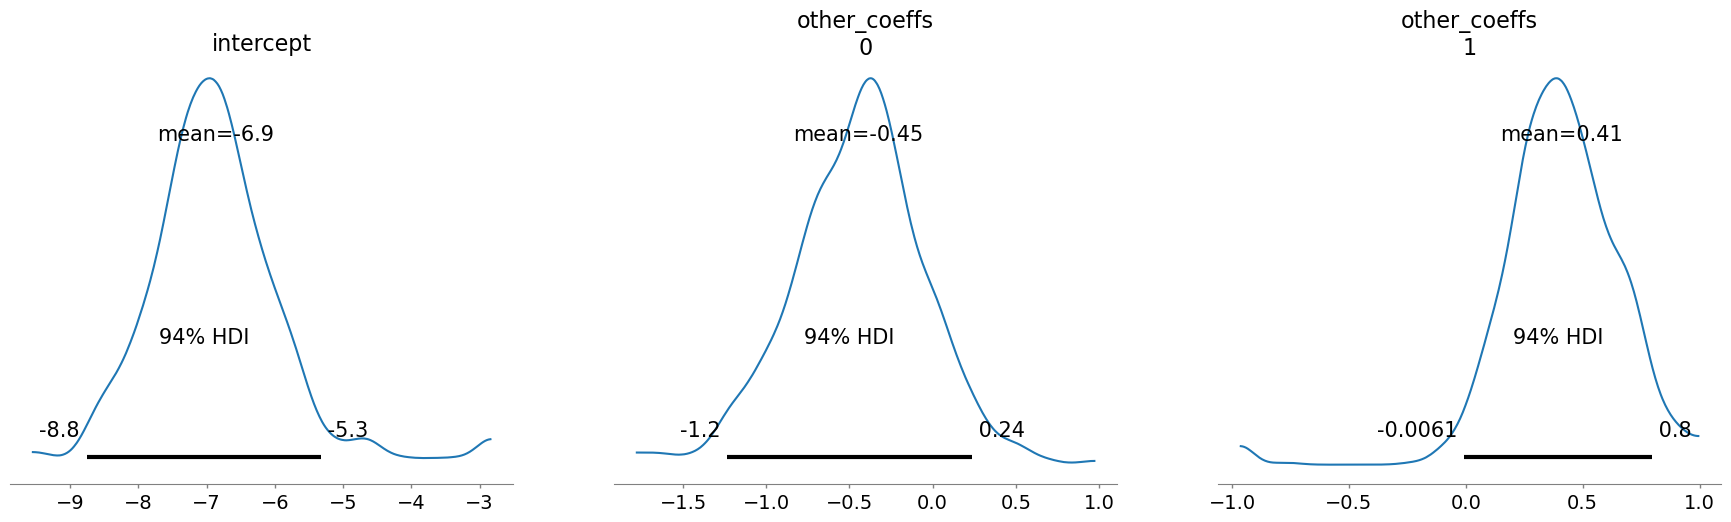

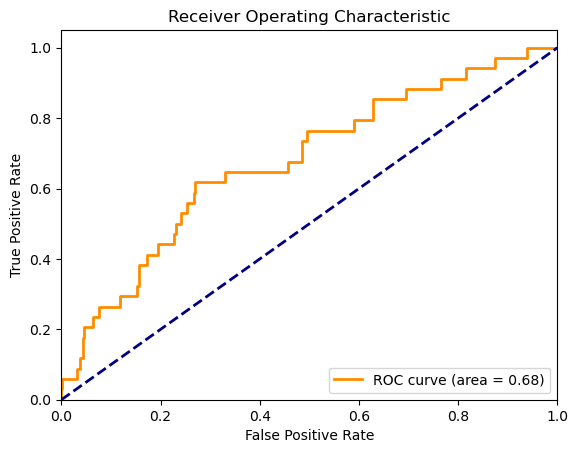

In [162]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import arviz as az

# Assuming the 'logistic_model' and 'trace' are already defined and generated from the previous steps

# Plot the trace of the sampling for the coefficients and the intercept
with logistic_model:
    az.plot_trace(trace)
    plt.show()  # Display the trace plot

# Plot the posterior distributions of a few selected parameters
# Let's plot the intercept and the first two coefficients as an example
pm.plot_posterior(trace, var_names=['intercept', 'other_coeffs'], coords={'other_coeffs_dim_0': [0, 1]})
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, test_probs)
roc_auc = roc_auc_score(y_test, test_probs)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [163]:
import pymc3 as pm

# Assuming 'trace' is the MCMC trace object you obtained from sampling

# Check for the effective number of samples
ess = pm.effective_n(trace)
print(ess)

# Check the Gelman-Rubin statistic, also known as R-hat.
# Values close to 1.0 indicate good convergence.
rhat = pm.gelman_rubin(trace)
print(rhat)

# There are other diagnostic functions as well, for example:
# Summary statistics for the trace
summary = pm.summary(trace)
print(summary)

# Plotting autocorrelation for the trace samples
pm.autocorrplot(trace)
pm.plot_posterior(trace)

# You can also check for divergences, which can indicate sampling problems
divergences = trace['diverging'].nonzero()[0]
print(f'Number of Divergent Chains: {len(divergences)}')

# For a more comprehensive diagnostic evaluation, you can use `pm.diagnostics.check_trace`
# This function runs multiple checks and returns any potential issues it finds
pm.diagnostics.check_trace(trace)


AttributeError: module 'pymc3' has no attribute 'effective_n'

In [121]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
import pandas as pd

# Example feature matrix X
X = X_train  # replace with your actual seismic data features

Bgmm = BayesianGaussianMixture(n_components=6, covariance_type='full',
                               weight_concentration_prior=0.01, max_iter=200)
Bgmm.fit(X)

# Predict the probabilities of each component (cluster)
probs = Bgmm.predict_proba(X)

# Summarize the results to see the distribution across clusters
results = np.sum(probs, axis=0)
results_df = pd.DataFrame(results.round(0), columns=['# of individuals'], index=range(1, 7))

print(results_df)


   # of individuals
1             459.0
2             644.0
3             542.0
4              84.0
5             173.0
6             165.0


In [128]:
X

ghazard_enc_0  seismic_enc_0  scaled_genergy  nbumps3  scaled_energy  \
0               0.0            0.0       10.881250      3.0       8.476580   
1               0.0            0.0        9.199279      0.0       0.000000   
2               0.0            0.0       10.240674      0.0       0.000000   
3               0.0            0.0        8.306472      0.0       6.398595   
4               0.0            1.0       11.001266      0.0       0.000000   
...             ...            ...             ...      ...            ...   
2062            0.0            1.0       12.021067      0.0       0.000000   
2063            0.0            0.0        9.239899      0.0       0.000000   
2064            0.0            0.0       12.676545      2.0       8.517393   
2065            0.0            1.0        8.917311      0.0       0.000000   
2066            0.0            0.0       13.580838      1.0       9.472782   

      shift_enc_0  scaled_gdenergy  nbumps2  scaled_gpuls  nbumps5  \
0             0.0        -0.042038      2.0      6.133398      0.0   
1             1.0        -0.415620      0.0      5.347108      0.0   
2             1.0        -0.004679      0.0      3.931826      0.0   
3             1.0        -0.540148      1.0      3.526361      0.0   
4             0.0         1.153427      0.0      6.703188      0.0   
...           ...              ...      ...           ...      ...   
2062          0.0        -0.066943      0.0      7.474205      0.0   
2063          1.0         0.007773      0.0      4.969813      0.0   
2064          0.0        -0.876372      0.0      6.919684      0.0   
2065          1.0        -0.540148      0.0      5.241747      0.0   
2066          0.0        -0.091849      0.0      7.268223      0.0   

      seismoacoustic_enc_0  nbumps4  nbumps  
0                      0.0      0.0     5.0  
1                      0.0      0.0     0.0  
2                      0.0      0.0     0.0  
3                      0.0      0.0     1.0  
4                      1.0      0.0     0.0  
...                    ...      ...     ...  
2062                   0.0      0.0     0.0  
2063                   0.0      0.0     0.0  
2064                   0.0      0.0     2.0  
2065                   0.0      0.0     0.0  
2066                   0.0      1.0     2.0  

[2067 rows x 13 columns]

In [126]:
df

nbumps  nbumps2  nbumps3  nbumps4  nbumps5  class  seismic_enc_0  \
0        0.0      0.0      0.0      0.0      0.0      0              0   
1        1.0      0.0      1.0      0.0      0.0      0              0   
2        0.0      0.0      0.0      0.0      0.0      0              0   
3        1.0      0.0      1.0      0.0      0.0      0              0   
4        0.0      0.0      0.0      0.0      0.0      0              0   
...      ...      ...      ...      ...      ...    ...            ...   
2579     0.0      0.0      0.0      0.0      0.0      0              1   
2580     0.0      0.0      0.0      0.0      0.0      0              1   
2581     0.0      0.0      0.0      0.0      0.0      0              1   
2582     0.0      0.0      0.0      0.0      0.0      0              0   
2583     0.0      0.0      0.0      0.0      0.0      0              0   

      seismoacoustic_enc_0  shift_enc_0  ghazard_enc_0  scaled_genergy  \
0                        0            1              0        9.627734   
1                        0            1              0        9.596962   
2                        0            1              0        8.993427   
3                        0            1              0       10.268825   
4                        0            1              0        9.444622   
...                    ...          ...            ...             ...   
2579                     0            0              1       11.307253   
2580                     0            0              0       10.648041   
2581                     0            0              0       10.202110   
2582                     0            0              0        9.688436   
2583                     0            0              0        9.453287   

      scaled_gpuls  scaled_gdenergy  scaled_energy  
0         3.871201        -1.050711       0.000000  
1         3.496508        -1.025805       7.601402  
2         3.401197        -1.162786       0.000000  
3         5.141664        -0.440526       8.006701  
4         4.043051        -0.938636       0.000000  
...            ...              ...            ...  
2579      6.665684         5.225478       0.000000  
2580      6.318968         2.498325       0.000000  
2581      6.291569         1.103616       0.000000  
2582      5.774552        -0.129207       0.000000  
2583      5.459586        -0.278640       0.000000  

[2584 rows x 14 columns]

C:\Users\katen\AppData\Local\Temp\ipykernel_10156\3936625707.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(list(cluster_assignments), palette='viridis')


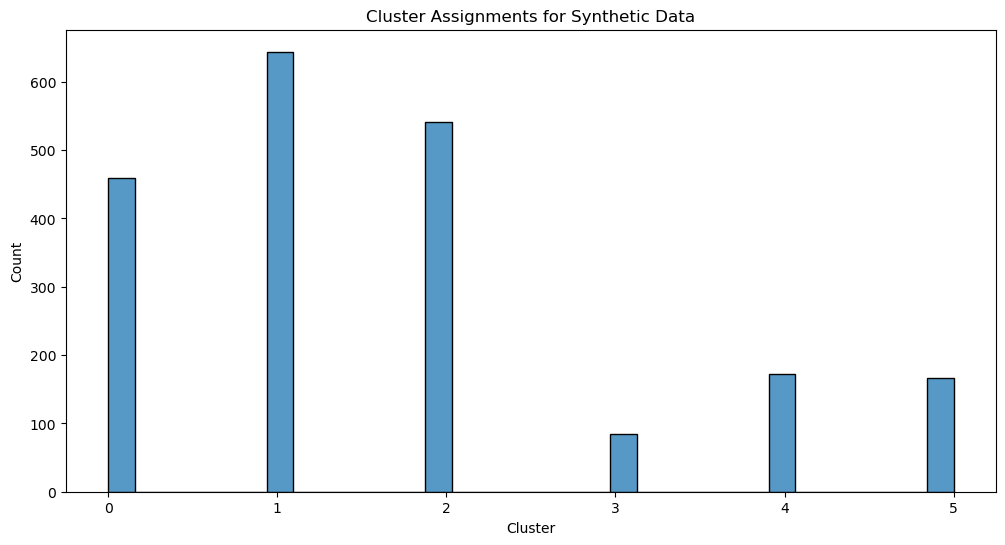

In [137]:
# Predict the cluster assignment for each data point
cluster_assignments = Bgmm.predict(X)
# Visualize the cluster assignments
plt.figure(figsize=(12, 6))
sns.histplot(list(cluster_assignments), palette='viridis')
plt.title('Cluster Assignments for Synthetic Data')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [141]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Assuming 'df' is your DataFrame and 'class' is the target variable
X = X_train
y = y_train
#df.drop('class', axis=1)  # Features
#y = df['class']  # Target

# Calculate correlation with the target variable
correlations = X.corrwith(y)
print("Correlations with the target variable:")
print(correlations)


# Select features with ANOVA F-value
# Select features with ANOVA F-value test
anova_selector = SelectKBest(f_classif, k='all')  # k='all' for ranking features
anova_selector.fit(X, y)
anova_scores = pd.DataFrame({
    'feature': X.columns,
    'ANOVA F-value': anova_selector.scores_,
    'p-value': anova_selector.pvalues_
}).sort_values(by='ANOVA F-value', ascending=False)

print("ANOVA F-value scores:")
print(anova_scores)


Correlations with the target variable:
ghazard_enc_0          -0.028697
seismic_enc_0          -0.020771
scaled_genergy          0.006850
nbumps3                -0.010306
scaled_energy          -0.011971
shift_enc_0             0.012940
scaled_gdenergy        -0.003637
nbumps2                -0.001149
scaled_gpuls           -0.001915
nbumps5                 0.026117
seismoacoustic_enc_0    0.013009
nbumps4                -0.014171
nbumps                 -0.008499
dtype: float64
ANOVA F-value scores:
                 feature  ANOVA F-value       p-value
12                nbumps     138.018997  6.784240e-31
7                nbumps2      95.807581  3.805916e-22
4          scaled_energy      90.537871  4.862560e-21
3                nbumps3      82.505026  2.398577e-19
2         scaled_genergy      80.840886  5.391662e-19
8           scaled_gpuls      55.704099  1.234628e-13
5            shift_enc_0      41.328292  1.593812e-10
1          seismic_enc_0      13.530441  2.407291e-04
11       

The correlation results show that none of the features have a strong linear relationship with the target variable since all correlation coefficients are close to 0. The correlation coefficient values range from -0.028697 to 0.026117, indicating very weak negative and positive relationships, respectively.

The ANOVA F-value scores are more informative in this case. They show how each feature's variation is related to the variation in the target variable. Higher F-values suggest a greater degree of difference between the group means (i.e., between the classes defined by the target variable). Here's a brief interpretation of the ANOVA F-value scores:

- `nbumps` has the highest ANOVA F-value, which means it has the most statistically significant difference in means between the groups (hazardous vs. non-hazardous states). This is supported by a very small p-value, indicating the result is highly unlikely to be due to random chance.

- `nbumps2`, `scaled_energy`, `nbumps3`, and `scaled_genergy` also have high F-values, suggesting they are statistically significant and potentially good predictors.

- `scaled_gpuls`, `shift_enc_0`, `seismic_enc_0`, and `nbumps4` show some significance but to a lesser extent.

- `ghazard_enc_0` has an F-value that suggests a low level of significance in predicting the target.

- `nbumps5`, `scaled_gdenergy`, and `seismoacoustic_enc_0` have the lowest F-values and p-values that are not significant (greater than 0.05), suggesting they do not contribute much information for predicting the target.

Overall, features with the highest ANOVA F-values (`nbumps`, `nbumps2`, `scaled_energy`, `nbumps3`, and `scaled_genergy`) would be good candidates to include in predictive models. Features with lower F-values or non-significant p-values might be considered for removal from the model to simplify it and potentially improve performance. However, these decisions should also be informed by domain expertise and further feature engineering.

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


Lowest BIC:  -29336.24856284399
      spherical          tied          diag          full
1  20972.830481  16886.591052  18852.423282  16886.591052
2 -18456.838415  13965.214956 -18451.034822 -18692.515943
3 -18909.090515  12384.515008 -19367.985889 -19367.586990
4 -19346.070015  11371.264063 -25227.841806 -25208.164175
5 -19336.932185  10440.538308 -25216.676875 -28653.434928
6 -19376.288838   9711.320829 -29336.248563 -28665.044800
7 -19497.454121   9204.682940 -29321.807962 -28646.466771
8 -19384.350589   9034.402150 -28673.650647 -27357.447009


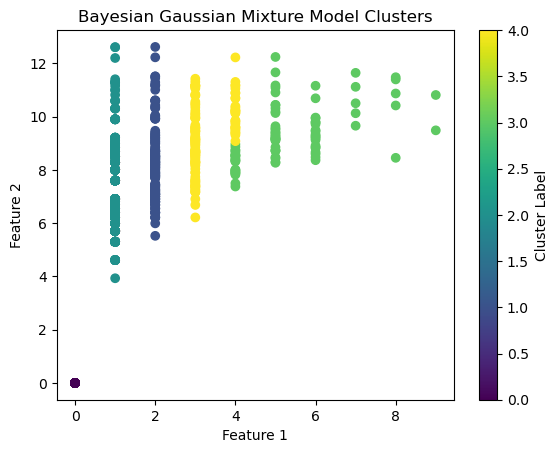

In [151]:
# Assuming df is your dataset
X = X_train[['nbumps', 'scaled_energy']]
# Initializing variables to store the best BIC and corresponding GMM
lowest_bic = np.infty
best_gmm = None

# Define the range of components and types of covariance matrix to try
n_components_range = range(1, 9)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic_matrix = np.zeros((len(n_components_range), len(cv_types)))

# Fit models and compute BIC
for i, cv_type in enumerate(cv_types):
    for j, n_components in enumerate(n_components_range):
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic = gmm.bic(X)  # Calculate the BIC
        bic_matrix[j, i] = bic

        # Update the lowest BIC and corresponding best GMM
        if bic < lowest_bic:
            lowest_bic = bic
            best_gmm = gmm

# Convert BIC matrix to a DataFrame for easier handling
bic_df = pd.DataFrame(bic_matrix, columns=cv_types, index=n_components_range)
print("Lowest BIC: ", lowest_bic)
print(bic_df)

# Now we fit the Bayesian Gaussian Mixture Model
bgmm = BayesianGaussianMixture(n_components=6, covariance_type='full',
                               weight_concentration_prior=0.01, max_iter=200)
bgmm.fit(X)

# Predict probabilities and visualize the clustering
labels = bgmm.predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')  # Adjust the indices for the scatter plot axes
plt.title('Bayesian Gaussian Mixture Model Clusters')
plt.xlabel('Feature 1')  # Adjust label based on selected feature
plt.ylabel('Feature 2')  # Adjust label based on selected feature
plt.colorbar(label='Cluster Label')
plt.show()


In [152]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([1166,  192,  487,   89,  133], dtype=int64))

The clusters appear to be vertically aligned, suggesting that Feature 2 (which seems to be scaled_energy) has a more significant role in distinguishing between clusters than Feature 1 (nbumps). The clusters are not overlapping much in the vertical direction, indicating good separation in terms of energy scaling.

Cluster Means:
     nbumps  scaled_energy
0  0.000736       0.002981
1  1.993986       8.183084
2  0.999711       7.311360
3  5.017926       9.215785
4  3.232192       9.135973
5  0.859216       3.479009


C:\Users\katen\AppData\Local\Temp\ipykernel_10156\385637353.py:24: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm.predict(X), palette=palette, alpha=0.6)


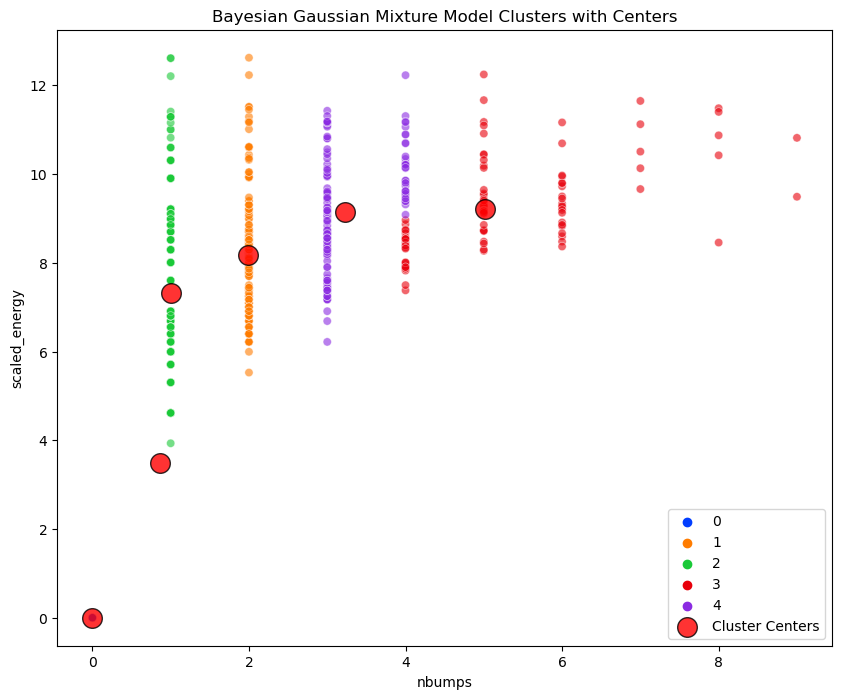

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture


# Retrieve the cluster means (centers) and covariances
cluster_means = bgmm.means_

# Convert cluster means to a DataFrame for easier interpretation
cluster_means_df = pd.DataFrame(cluster_means, columns=['nbumps', 'scaled_energy'])

# Print the cluster means
print("Cluster Means:")
print(cluster_means_df)

# Optionally, visualize the clusters with their means
plt.figure(figsize=(10, 8))

# Using a custom palette with as many colors as clusters
palette = sns.color_palette("bright", 5)

# Plot data points with transparency
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=bgmm.predict(X), palette=palette, alpha=0.6)

# Plot cluster centers with large, red markers
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, edgecolor='black', label='Cluster Centers', alpha=0.8)

# Labels and title
plt.xlabel('nbumps')
plt.ylabel('scaled_energy')
plt.title('Bayesian Gaussian Mixture Model Clusters with Centers')

# Include legend
plt.legend()
plt.show()


From the cluster means you've provided, we can interpret the clusters as follows:

1. Cluster 0 (Red on the far left):
   - This cluster has an average of nearly 0 `nbumps` and very low `scaled_energy`. This suggests that it represents shifts where virtually no seismic activity occurred, or it was so minimal that it was barely registered.

2. Cluster 1 (Orange):
   - With an average of almost 2 `nbumps` and high `scaled_energy`, this cluster may represent seismic events that are less frequent within a shift but are significantly energetic when they do occur.

3. Cluster 2 (Purple):
   - This cluster has an average of 1 `nbump` with fairly high `scaled_energy`. This could indicate shifts where a seismic event is likely to occur and can be quite strong, though not as energetic as those in Cluster 1.

4. Cluster 3 (Red on the far right):
   - With over 5 `nbumps` and the highest `scaled_energy` on average, this cluster represents the most seismically active and energetically potent shifts. These are shifts where multiple seismic events occur, each with high energy, potentially indicating the most hazardous situations.

5. Cluster 4 (Brown):
   - This cluster averages around 3 `nbumps` with very high `scaled_energy` similar to Cluster 3, suggesting that shifts falling into this cluster also experience multiple high-energy seismic events, but with slightly less frequency than in Cluster 3.

6. Cluster 5 (Green):
   - With an average of just under 1 `nbump` and moderate `scaled_energy`, this cluster could signify shifts where seismic activity is more common than Cluster 0 but generally less energetic than Clusters 1, 2, 3, and 4.

These interpretations are based on the means of each cluster and give us insight into the different types of seismic activity that might be expected during different shifts. Clusters with higher means for both `nbumps` and `scaled_energy` are particularly interesting as they suggest shifts with higher seismic risks. It's these clusters that might be prioritized for further analysis, monitoring, or preventative measures in a real-world mining context.

Cluster Means:
     nbumps  scaled_energy
0  0.000000       0.000000
1  2.000000       8.448902
2  3.669506      10.741296
3  2.000000       6.378062
4  3.219369       8.562534
5  5.353694       9.392424
6  2.000000       8.210084
7  1.000000       7.319178


C:\Users\katen\AppData\Local\Temp\ipykernel_10156\1365022015.py:24: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=gmm.predict(X), palette=palette, alpha=0.6)


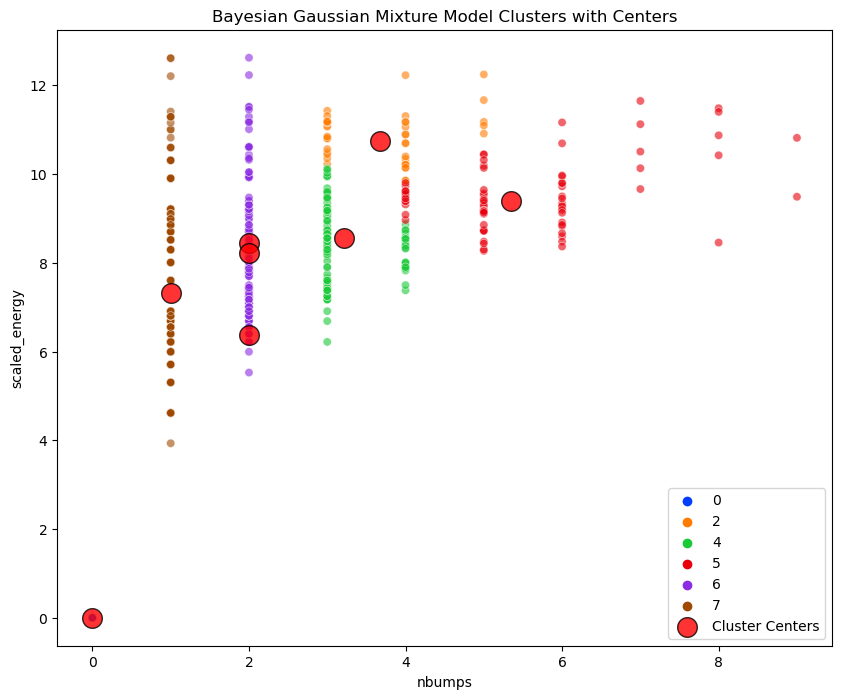

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture


# Retrieve the cluster means (centers) and covariances
cluster_means = gmm.means_

# Convert cluster means to a DataFrame for easier interpretation
cluster_means_df = pd.DataFrame(cluster_means, columns=['nbumps', 'scaled_energy'])

# Print the cluster means
print("Cluster Means:")
print(cluster_means_df)

# Optionally, visualize the clusters with their means
plt.figure(figsize=(10, 8))

# Using a custom palette with as many colors as clusters
palette = sns.color_palette("bright", 8)

# Plot data points with transparency
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=gmm.predict(X), palette=palette, alpha=0.6)

# Plot cluster centers with large, red markers
plt.scatter(cluster_means[:, 0], cluster_means[:, 1], c='red', s=200, edgecolor='black', label='Cluster Centers', alpha=0.8)

# Labels and title
plt.xlabel('nbumps')
plt.ylabel('scaled_energy')
plt.title('Bayesian Gaussian Mixture Model Clusters with Centers')

# Include legend
plt.legend()
plt.show()
